In [1]:
!gdown --fuzzy "https://drive.google.com/file/d/14F3TlHc6RXanvMnJSdrCgzRIotjK8BMd/view?usp=drive_link"

Downloading...
From: https://drive.google.com/uc?id=14F3TlHc6RXanvMnJSdrCgzRIotjK8BMd
To: /content/train_val_minus_minival_2014.json
100% 286M/286M [00:06<00:00, 44.3MB/s]


In [2]:
!gdown --fuzzy "https://drive.google.com/file/d/1nG3k7MMHiPTVHBc3J5vtxAfdrJ6hhb-i/view?usp=drive_link"

Downloading...
From: https://drive.google.com/uc?id=1nG3k7MMHiPTVHBc3J5vtxAfdrJ6hhb-i
To: /content/minival_2014.json
100% 255M/255M [00:06<00:00, 37.2MB/s]


In [3]:
!gdown --fuzzy "https://drive.google.com/file/d/16TmbZrs217uGfBRPCOVgE-5rRVs35AI5/view?usp=drive_link"

Downloading...
From: https://drive.google.com/uc?id=16TmbZrs217uGfBRPCOVgE-5rRVs35AI5
To: /content/minival_2014_det.json
100% 17.3M/17.3M [00:00<00:00, 69.8MB/s]


In [4]:
import json
import os

from PIL import Image
import cv2
import numpy as np
from pycocotools import mask
import matplotlib.pyplot as plt

In [5]:
json_gt_minus_minival = json.load(open('/content/train_val_minus_minival_2014.json', 'r'))

In [3]:
json_det = json.load(open('/content/minival_2014_det.json', 'r'))

In [4]:
json_gt_minus_minival.keys()

dict_keys(['annotations', 'categories', 'images', 'info', 'licenses'])

In [5]:
json_gt_minus_minival['annotations'][0]

{'segmentation': [[329.88,
   211.23,
   337.63,
   211.93,
   341.51,
   210.17,
   341.86,
   206.65,
   340.1,
   202.77,
   335.52,
   199.6,
   335.52,
   197.13,
   335.52,
   190.44,
   339.04,
   186.21,
   342.57,
   170.35,
   345.74,
   159.43,
   342.57,
   154.14,
   340.1,
   148.86,
   336.93,
   143.92,
   337.28,
   138.28,
   344.68,
   138.28,
   340.45,
   122.43,
   339.75,
   116.79,
   334.46,
   107.63,
   320.37,
   104.1,
   325.65,
   97.06,
   326,
   91.06,
   321.77,
   82.25,
   316.49,
   89.66,
   305.21,
   87.19,
   304.51,
   92.47,
   304.16,
   97.06,
   305.21,
   100.58,
   304.16,
   103.4,
   292.53,
   105.51,
   284.42,
   123.84,
   278.43,
   140.05,
   273.14,
   146.74,
   273.85,
   152.73,
   279.49,
   156.26,
   281.6,
   154.14,
   284.07,
   144.63,
   289,
   133,
   293.23,
   133.7,
   294.99,
   125.95,
   295.35,
   157.67,
   312.26,
   157.31,
   318.96,
   150.27,
   335.17,
   150.27,
   333.76,
   157.31,
   324.95,
   158

In [6]:
json_det[0]

{'category_id': 1,
 'image_id': 369037,
 'bbox': [117.41, 233.54, 305.62, 402.31],
 'score': 0.9971}

In [6]:
!cp /content/drive/MyDrive/solo_coco.zip ./fish_coco.zip

In [7]:
!rm -rf solo_coco

In [8]:
!unzip fish_coco.zip > /dev/null

In [9]:
fish_gt = json.load(open('/content/solo_coco/coco/bbox.json', 'r'))
fish_seg_gt = json.load(open('/content/solo_coco/coco/semantic.json', 'r'))

In [8]:
fish_gt.keys()

dict_keys(['info', 'licences', 'images', 'annotations', 'categories'])

In [9]:
fish_seg_gt.keys()

dict_keys(['info', 'licences', 'images', 'annotations', 'categories'])

In [16]:
fish_gt['annotations'][340:380]

[{'segmentation': [],
  'area': 1221,
  'iscrowd': 0,
  'image_id': 10,
  'bbox': [205, 66, 37, 33],
  'keypoints': [239, 69, 2, 215, 96, 1, 229, 80, 1, 227, 83, 2],
  'num_keypoints': 4,
  'category_id': 1,
  'id': 340},
 {'segmentation': [],
  'area': 403,
  'iscrowd': 0,
  'image_id': 10,
  'bbox': [0, 150, 13, 31],
  'keypoints': [9, 161, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  'num_keypoints': 1,
  'category_id': 1,
  'id': 341},
 {'segmentation': [],
  'area': 1204,
  'iscrowd': 0,
  'image_id': 10,
  'bbox': [378, 0, 43, 28],
  'keypoints': [0, 0, 0, 393, 14, 1, 0, 0, 0, 415, 5, 2],
  'num_keypoints': 2,
  'category_id': 1,
  'id': 342},
 {'segmentation': [],
  'area': 6075,
  'iscrowd': 0,
  'image_id': 10,
  'bbox': [400, 30, 81, 75],
  'keypoints': [479, 36, 2, 419, 93, 1, 446, 59, 2, 455, 68, 2],
  'num_keypoints': 4,
  'category_id': 1,
  'id': 343},
 {'segmentation': [],
  'area': 798,
  'iscrowd': 0,
  'image_id': 10,
  'bbox': [438, 189, 14, 57],
  'keypoints': [449, 191, 2, 43

In [17]:
fish_gt['annotations'][362]

{'segmentation': [],
 'area': 47250,
 'iscrowd': 0,
 'image_id': 11,
 'bbox': [175, 171, 250, 189],
 'keypoints': [410, 183, 1, 0, 0, 0, 341, 215, 2, 409, 232, 2],
 'num_keypoints': 3,
 'category_id': 1,
 'id': 362}

In [18]:
fish_seg_gt['annotations'][362]

{'segmentation': {'size': [360, 640],
  'counts': 'R5o0`3Gc28^MHa28`MH`27`ME`LBn5i0cME_LBn5i0bMEd2;\\MFc2:^MFb29^MUO_L`0R6<PJTO]3`0c2;oIVO_3?cL@h5k0VJVO`3?`LBj5i0TJUOf3?ZLEk5h0mMIS26nMJR24QNJo16SNHn16SNKl17RNWOUL>j5;UNDl1<VNAj1?XN@h1?^N\\Oa1c0bN\\O^1c0cN]O\\1d0dN]O[1a0hN^OX1`0jN@U1`0lNAS1>oNAQ1>POAQ1=ROBo0:TOFn04WOK_Xm00cmRO0L1oD0R;2001ON2O2ZJJM0QK8S5IJ0nJ;Y5FAOUKb0Z5A]Of0d0ZOZOh0f0YOXOg06TOfK7P4e0<@XKMX4d0a0O^O0d01[OMg09SODP1a0lKiNk1b0TM]OW5\\1cKhNT26b2W1RKeNY8`1_GbNb8c1WG_Ni8n12O1O13M3M]O]GbNe8V1cGhN^8IYGh0i0ZOQ8NdGOgm2Ok\\M0O100mDOo:1PE0o:1PE0P;31O1O001O000100O00100O001jJKYO5g0KXO5i0KVO6j0JVO6i0KVO5k0KUO5k0KTO6l0JSO6m0KRO6n0JnN:R1FoN8R1HoN7Q1IoN7P1JQO4P1LPO4P1LoN5P1LPO3Q1MnN4R1LnN40ISL4m33OJTL3l331JSL3l330KSL3m310MSL2m310MSL2l320MSL2m301MSL3k311L`KN85W410M^K192Y4O1N\\K1;2X4O0O[K1>1V401NYK2a00U4O1OYK2a01U4N18kKKT4L19jKMU4I19jK0T4G38iK2T4D49iK4T4A4:gK7R9HoF9P9FQG;R2\\OT49jI<R2[OR49nI<m1]OU46oI>l1\\OT47oI>m1[OR48QJ>n1XOQ4:QJ?m1XOQ49RJ`0m1WOo3;SJ?m1WOo3:TJ`0m1VOn3:UJa0l1VOn3:UJa0l1VOm3:

In [19]:
sample_id = 362
sample_image_id = 11

In [44]:
def image_id2image(image_id, anno_json):
    for img in anno_json['images']:
        if image_id == img['id']:
            return img
    raise Exception('not found')

In [160]:
def xywh2xyxy(bbox):
    x, y, w, h = bbox
    x1, y1 = x, y
    x2, y2 = x+w, y+h
    return (x1, y1, x2, y2)


def xyxy2xywh(bbox):
    x, y, x2, y2 = bbox
    w = x2-x
    h = y2-y
    return (x, y, w, h)

In [22]:
image_id2image(11, fish_gt)

{'id': 11, 'width': 640.0, 'height': 360.0, 'file_name': 'camera_11.png'}

In [24]:
_img = Image.open(os.path.join('/content/solo_coco/coco/images', 'camera_11.png')).convert('RGB')

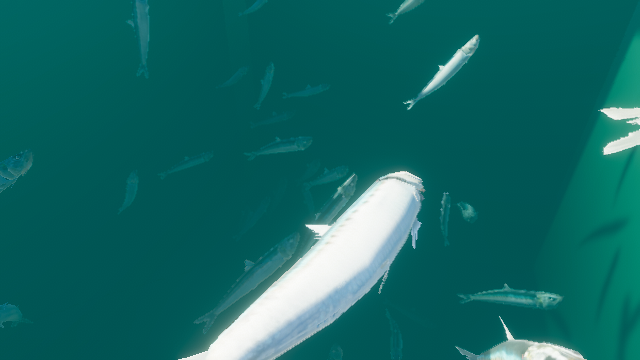

In [25]:
_img

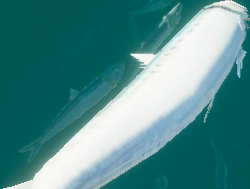

In [26]:
Image.open(os.path.join('/content/solo_coco/coco/images', 'camera_11.png')).crop(xywh2xyxy( [175, 171, 250, 189]))

In [27]:
_img_np = np.asarray(_img).astype(np.uint8)

In [28]:
for anno in fish_gt['annotations']:
    if anno['image_id'] != sample_image_id:
        continue
    for kp in np.array(anno['keypoints']).reshape(-1, 3):
        # pt = (kp[1], kp[0])
        # print(kp)
        pt = (kp[0], kp[1])
        visible = kp[2]
        if visible == 0:  # kp => (0, 0, 0), 0 means the joint either does not exist or is outside of the image's bounds
            color = (255, 0, 0)  # red
        elif visible == 1:  # 1 denotes a joint that is inside of the image but cannot be seen because the part of the object it belongs to is not visible in the image
            color = (0, 255, 0)  # green
        elif visible == 2:  # 2 means the joint was present and visible
            color = (0, 0, 255)  # blue
        _img_np = cv2.circle(_img_np, pt, 3, color=color, thickness=-1)

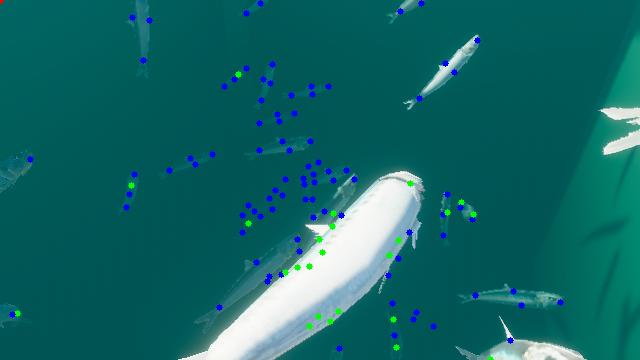

In [29]:
Image.fromarray(_img_np)

In [30]:
mask.decode(fish_seg_gt['annotations'][sample_id]['segmentation'])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [31]:
mask.decode(fish_seg_gt['annotations'][sample_id]['segmentation']).shape

(360, 640)

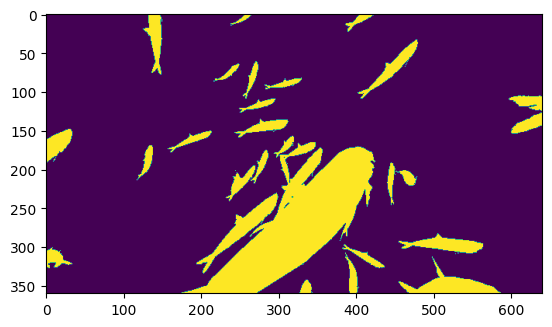

In [34]:
plt.imshow(mask.decode(fish_seg_gt['annotations'][sample_id]['segmentation']))

## cvpack

### dataset

In [10]:
import math
import torch
import torch.distributed as dist
from torch.utils.data.sampler import Sampler


class DistributedSampler(Sampler):
    """Sampler that restricts data loading to a subset of the dataset.
    It is especially useful in conjunction with
    :class:`torch.nn.parallel.DistributedDataParallel`. In such case, each
    process can pass a DistributedSampler instance as a DataLoader sampler,
    and load a subset of the original dataset that is exclusive to it.
    .. note::
        Dataset is assumed to be of constant size.
    Arguments:
        dataset: Dataset used for sampling.
        num_replicas (optional): Number of processes participating in
            distributed training.
        rank (optional): Rank of the current process within num_replicas.
    """

    def __init__(self, dataset, num_replicas=None, rank=None, shuffle=True):
        if num_replicas is None:
            if not dist.is_available():
                raise RuntimeError("Requires distributed package to be available")
            num_replicas = dist.get_world_size()
        if rank is None:
            if not dist.is_available():
                raise RuntimeError("Requires distributed package to be available")
            rank = dist.get_rank()
        self.dataset = dataset
        self.num_replicas = num_replicas
        self.rank = rank
        self.epoch = 0
        self.num_samples = int(math.ceil(len(self.dataset) * 1.0 / self.num_replicas))
        self.total_size = self.num_samples * self.num_replicas
        self.shuffle = shuffle

    def __iter__(self):
        if self.shuffle:
            # deterministically shuffle based on epoch
            g = torch.Generator()
            g.manual_seed(self.epoch)
            indices = torch.randperm(len(self.dataset), generator=g).tolist()
        else:
            indices = torch.arange(len(self.dataset)).tolist()

        # add extra samples to make it evenly divisible
        indices += indices[:(self.total_size - len(indices))]
        assert len(indices) == self.total_size

        # subsample
        offset = self.num_samples * self.rank
        indices = indices[offset : offset + self.num_samples]
        assert len(indices) == self.num_samples

        return iter(indices)

    def __len__(self):
        return self.num_samples

    def set_epoch(self, epoch):
        self.epoch = epoch

In [11]:
import itertools
import copy
import bisect

import torch
from torch.utils.data.sampler import BatchSampler
from torch.utils.data.sampler import Sampler


def _quantize(x, bins):
    bins = copy.copy(bins)
    bins = sorted(bins)
    quantized = list(map(lambda y: bisect.bisect_right(bins, y), x))
    return quantized


def _compute_aspect_ratios(dataset):
    aspect_ratios = []
    for i in range(len(dataset)):
        img_info = dataset.get_img_info(i)
        aspect_ratio = float(img_info["height"]) / float(
            img_info["width"])
        aspect_ratios.append(aspect_ratio)
    return aspect_ratios


class GroupedBatchSampler(BatchSampler):
    """
    Wraps another sampler to yield a mini-batch of indices.
    It enforces that elements from the same group should appear in
    groups of batch_size.
    It also tries to provide mini-batches which follows an ordering which is
    as close as possible to the ordering from the original sampler.
    Arguments:
        sampler (Sampler): Base sampler.
        batch_size (int): Size of mini-batch.
        drop_uneven (bool): If ``True``, the sampler will drop the batches whose
            size is less than ``batch_size``
    """

    def __init__(self, sampler, dataset, aspect_grouping, batch_size,
                 drop_uneven=False):
        aspect_ratios = _compute_aspect_ratios(dataset)
        group_ids = _quantize(aspect_ratios, aspect_grouping)
        if not isinstance(sampler, Sampler):
            raise ValueError(
                "sampler should be an instance of "
                "torch.utils.data.Sampler, but got sampler={}".format(sampler)
            )
        self.sampler = sampler
        self.group_ids = torch.as_tensor(group_ids)
        assert self.group_ids.dim() == 1
        self.batch_size = batch_size
        self.drop_uneven = drop_uneven

        self.groups = torch.unique(self.group_ids).sort(0)[0]

        self._can_reuse_batches = False

    def _prepare_batches(self):
        dataset_size = len(self.group_ids)
        # get the sampled indices from the sampler
        sampled_ids = torch.as_tensor(list(self.sampler))
        # potentially not all elements of the dataset were sampled
        # by the sampler (e.g., DistributedSampler).
        # construct a tensor which contains -1 if the element was
        # not sampled, and a non-negative number indicating the
        # order where the element was sampled.
        # for example. if sampled_ids = [3, 1] and dataset_size = 5,
        # the order is [-1, 1, -1, 0, -1]
        order = torch.full((dataset_size,), -1, dtype=torch.int64)
        order[sampled_ids] = torch.arange(len(sampled_ids))

        # get a mask with the elements that were sampled
        mask = order >= 0

        # find the elements that belong to each individual cluster
        clusters = [(self.group_ids == i) & mask for i in self.groups]
        # get relative order of the elements inside each cluster
        # that follows the order from the sampler
        relative_order = [order[cluster] for cluster in clusters]
        # with the relative order, find the absolute order in the
        # sampled space
        permutation_ids = [s[s.sort()[1]] for s in relative_order]
        # permute each cluster so that they follow the order from
        # the sampler
        permuted_clusters = [sampled_ids[idx] for idx in permutation_ids]

        # splits each cluster in batch_size, and merge as a list of tensors
        splits = [c.split(self.batch_size) for c in permuted_clusters]
        merged = tuple(itertools.chain.from_iterable(splits))

        # now each batch internally has the right order, but
        # they are grouped by clusters. Find the permutation between
        # different batches that brings them as close as possible to
        # the order that we have in the sampler. For that, we will consider the
        # ordering as coming from the first element of each batch, and sort
        # correspondingly
        first_element_of_batch = [t[0].item() for t in merged]
        # get and inverse mapping from sampled indices and the position where
        # they occur (as returned by the sampler)
        inv_sampled_ids_map = {v: k for k, v in enumerate(sampled_ids.tolist())}
        # from the first element in each batch, get a relative ordering
        first_index_of_batch = torch.as_tensor(
            [inv_sampled_ids_map[s] for s in first_element_of_batch]
        )

        # permute the batches so that they approximately follow the order
        # from the sampler
        permutation_order = first_index_of_batch.sort(0)[1].tolist()
        # finally, permute the batches
        batches = [merged[i].tolist() for i in permutation_order]

        if self.drop_uneven:
            kept = []
            for batch in batches:
                if len(batch) == self.batch_size:
                    kept.append(batch)
            batches = kept
        return batches

    def __iter__(self):
        if self._can_reuse_batches:
            batches = self._batches
            self._can_reuse_batches = False
        else:
            batches = self._prepare_batches()
        self._batches = batches
        return iter(batches)

    def __len__(self):
        if not hasattr(self, "_batches"):
            self._batches = self._prepare_batches()
            self._can_reuse_batches = True
        return len(self._batches)

In [12]:
from torch.utils.data.sampler import BatchSampler


class IterationBasedBatchSampler(BatchSampler):
    """
    Wraps a BatchSampler, resampling from it until
    a specified number of iterations have been sampled
    """

    def __init__(self, batch_sampler, num_iterations, start_iter=0):
        self.batch_sampler = batch_sampler
        self.num_iterations = num_iterations
        self.start_iter = start_iter

    def __iter__(self):
        iteration = self.start_iter
        while iteration <= self.num_iterations:
            # if the underlying sampler has a set_epoch method, like
            # DistributedSampler, used for making each process see
            # a different split of the dataset, then set it
            if hasattr(self.batch_sampler.sampler, "set_epoch"):
                self.batch_sampler.sampler.set_epoch(iteration)
            for batch in self.batch_sampler:
                iteration += 1
                if iteration > self.num_iterations:
                    break
                yield batch

    def __len__(self):
        return self.num_iterations

## utils

### loss

In [13]:
import torch
import torch.nn as nn

class JointsL2Loss(nn.Module):
    def __init__(self, has_ohkm=False, topk=8, thresh1=1, thresh2=0):
        super(JointsL2Loss, self).__init__()
        self.has_ohkm = has_ohkm
        self.topk = topk
        self.t1 = thresh1
        self.t2 = thresh2
        method = 'none' if self.has_ohkm else 'mean'
        self.calculate = nn.MSELoss(reduction=method)

    def forward(self, output, valid, label):
        assert output.shape == label.shape
        batch_size = output.size(0)
        keypoint_num = output.size(1)
        loss = 0

        for i in range(batch_size):
            pred = output[i].reshape(keypoint_num, -1)
            gt = label[i].reshape(keypoint_num, -1)

            if not self.has_ohkm:
                weight = torch.gt(valid[i], self.t1).float()
                gt = gt * weight

            tmp_loss = self.calculate(pred, gt)

            if self.has_ohkm:
                tmp_loss = tmp_loss.mean(dim=1)
                weight = torch.gt(valid[i].squeeze(), self.t2).float()
                tmp_loss = tmp_loss * weight
                topk_val, topk_id = torch.topk(tmp_loss, k=self.topk, dim=0,
                        sorted=False)
                sample_loss = topk_val.mean(dim=0)
            else:
                sample_loss = tmp_loss

            loss = loss + sample_loss

        return loss / batch_size

### dataloader

In [14]:
import math

import torch
import torchvision.transforms as transforms

# from cvpack.dataset import torch_samplers

In [15]:
def get_train_loader(
        cfg, num_gpu, is_dist=True, is_shuffle=True, start_iter=0):
    # -------- get raw dataset interface -------- #
    normalize = transforms.Normalize(mean=cfg.INPUT.MEANS, std=cfg.INPUT.STDS)
    transform = transforms.Compose([transforms.ToTensor(), normalize])
    attr = load_dataset(cfg.DATASET.NAME)
    if cfg.DATASET.NAME == 'COCO':
        Dataset = COCODataset
    elif cfg.DATASET.NAME == 'MPII':
        Dataset = MPIIDataset
    elif cfg.DATASET.NAME == 'COCO_CUSTOM_FISH':
        Dataset = COCOCustomFishDataset
    dataset = Dataset(attr, 'train', transform)

    # -------- make samplers -------- #
    if is_dist:
        sampler = DistributedSampler(
                dataset, shuffle=is_shuffle)
    elif is_shuffle:
        sampler = torch.utils.data.sampler.RandomSampler(dataset)
    else:
        sampler = torch.utils.data.sampler.SequentialSampler(dataset)

    images_per_gpu = cfg.SOLVER.IMS_PER_GPU
    # images_per_gpu = cfg.SOLVER.IMS_PER_BATCH // num_gpu

    aspect_grouping = [1] if cfg.DATALOADER.ASPECT_RATIO_GROUPING else []
    if aspect_grouping:
        batch_sampler = GroupedBatchSampler(
                sampler, dataset, aspect_grouping, images_per_gpu,
                drop_uneven=False)
    else:
        batch_sampler = torch.utils.data.sampler.BatchSampler(
                sampler, images_per_gpu, drop_last=False)

    batch_sampler = IterationBasedBatchSampler(
            batch_sampler, cfg.SOLVER.MAX_ITER, start_iter)

    # -------- make data_loader -------- #
    class BatchCollator(object):
        def __init__(self, size_divisible):
            self.size_divisible = size_divisible

        def __call__(self, batch):
            transposed_batch = list(zip(*batch))
            images = torch.stack(transposed_batch[0], dim=0)
            valids = torch.stack(transposed_batch[1], dim=0)
            labels = torch.stack(transposed_batch[2], dim=0)

            return images, valids, labels

    data_loader = torch.utils.data.DataLoader(
            dataset, num_workers=cfg.DATALOADER.NUM_WORKERS,
            batch_sampler=batch_sampler,
            collate_fn=BatchCollator(cfg.DATALOADER.SIZE_DIVISIBILITY), )

    return data_loader


def get_test_loader(cfg, num_gpu, local_rank, stage, is_dist=True):
    # -------- get raw dataset interface -------- #
    normalize = transforms.Normalize(mean=cfg.INPUT.MEANS, std=cfg.INPUT.STDS)
    transform = transforms.Compose([transforms.ToTensor(), normalize])
    attr = load_dataset(cfg.DATASET.NAME)
    if cfg.DATASET.NAME == 'COCO':
        Dataset = COCODataset
    elif cfg.DATASET.NAME == 'MPII':
        Dataset = MPIIDataset
    elif cfg.DATASET.NAME == 'COCO_CUSTOM_FISH':
        Dataset = COCOCustomFishDataset
    dataset = Dataset(attr, stage, transform)

    # -------- split dataset to gpus -------- #
    num_data = dataset.__len__()
    num_data_per_gpu = math.ceil(num_data / num_gpu)
    st = local_rank * num_data_per_gpu
    ed = min(num_data, st + num_data_per_gpu)
    indices = range(st, ed)
    subset= torch.utils.data.Subset(dataset, indices)

    # -------- make samplers -------- #
    sampler = torch.utils.data.sampler.SequentialSampler(subset)

    images_per_gpu = cfg.TEST.IMS_PER_GPU

    batch_sampler = torch.utils.data.sampler.BatchSampler(
            sampler, images_per_gpu, drop_last=False)

    # -------- make data_loader -------- #
    class BatchCollator(object):
        def __init__(self, size_divisible):
            self.size_divisible = size_divisible

        def __call__(self, batch):
            transposed_batch = list(zip(*batch))
            images = torch.stack(transposed_batch[0], dim=0)
            scores = list(transposed_batch[1])
            centers = list(transposed_batch[2])
            scales = list(transposed_batch[3])
            image_ids = list(transposed_batch[4])

            return images, scores, centers, scales, image_ids

    data_loader = torch.utils.data.DataLoader(
            subset, num_workers=cfg.DATALOADER.NUM_WORKERS,
            batch_sampler=batch_sampler,
            collate_fn=BatchCollator(cfg.DATALOADER.SIZE_DIVISIBILITY), )
    data_loader.ori_dataset = dataset

    return data_loader

### transform

In [16]:
import numpy as np
import cv2


def get_affine_transform(center, scale, rot, output_size):
    if not isinstance(scale, np.ndarray) and not isinstance(scale, list):
        scale = np.array([scale, scale])
    scale_tmp = scale * 200.0

    src_w = scale_tmp[0]
    dst_w = output_size[1]
    dst_h = output_size[0]

    rot_rad = np.pi * rot / 180
    src_dir = get_dir([0, src_w * -0.5], rot_rad)
    dst_dir = np.array([0, dst_w * -0.5], np.float32)

    src = np.zeros((3, 2), dtype=np.float32)
    dst = np.zeros((3, 2), dtype=np.float32)
    src[0, :] = center
    src[1, :] = center + src_dir
    dst[0, :] = [dst_w * 0.5, dst_h * 0.5]
    dst[1, :] = np.array([dst_w * 0.5, dst_h * 0.5]) + dst_dir

    src[2:, :] = get_3rd_point(src[0, :], src[1, :])
    dst[2:, :] = get_3rd_point(dst[0, :], dst[1, :])

    trans = cv2.getAffineTransform(np.float32(src), np.float32(dst))

    return trans


def affine_transform(pt, t):
    new_pt = np.array([pt[0], pt[1], 1.])
    new_pt = np.dot(t, new_pt)
    return new_pt[:2]


def get_3rd_point(a, b):
    direct = a - b
    return b + np.array([-direct[1], direct[0]], dtype=np.float32)


def get_dir(src_point, rot_rad):
    sn, cs = np.sin(rot_rad), np.cos(rot_rad)

    src_result = [0, 0]
    src_result[0] = src_point[0] * cs - src_point[1] * sn
    src_result[1] = src_point[0] * sn + src_point[1] * cs

    return src_result


def flip_back(output, pairs):
    output = output[:, :, :, ::-1]

    for pair in pairs:
        tmp = output[:, pair[0], :, :].copy()
        output[:, pair[0], :, :] = output[:, pair[1], :, :]
        output[:, pair[1], :, :] = tmp

    return output


def flip_joints(joints, joints_vis, width, pairs):
    joints[:, 0] = width - joints[:, 0] - 1

    for pair in pairs:
        joints[pair[0], :], joints[pair[1], :] = \
            joints[pair[1], :], joints[pair[0], :].copy()
        joints_vis[pair[0], :], joints_vis[pair[1], :] = \
            joints_vis[pair[1], :], joints_vis[pair[0], :].copy()

    return joints, joints_vis

### solver

In [17]:
import torch.optim as optim

def make_optimizer(cfg, model, num_gpu):
    if cfg.SOLVER.OPTIMIZER == 'Adam':
        optimizer = optim.Adam(model.parameters(),
                lr=cfg.SOLVER.BASE_LR * num_gpu,
                betas=(0.9, 0.999), eps=1e-08,
                weight_decay=cfg.SOLVER.WEIGHT_DECAY)
    elif cfg.OPTIMIZER == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=cfg.SOLVER.BASE_LR,
                momentum=cfg.SOLVER.MOMENTUM,
                weight_decay=cfg.SOLVER.WEIGHT_DECAY)

    return optimizer


def make_lr_scheduler(cfg, optimizer):
    w_iters = cfg.SOLVER.WARMUP_ITERS
    w_fac = cfg.SOLVER.WARMUP_FACTOR
    max_iter = cfg.SOLVER.MAX_ITER
    lr_lambda = lambda iteration : w_fac + (1 - w_fac) * iteration / w_iters \
            if iteration < w_iters \
            else 1 - (iteration - w_iters) / (max_iter - w_iters)
    scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda, last_epoch=-1)

    return scheduler

## dataset

### attribute

In [18]:
from easydict import EasyDict as edict

class COCO:
    NAME = 'COCO'

    KEYPOINT = edict()
    KEYPOINT.NUM = 17
    KEYPOINT.FLIP_PAIRS = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12],
            [13, 14], [15, 16]]
    KEYPOINT.UPPER_BODY_IDS = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    KEYPOINT.LOWER_BODY_IDS = [11, 12, 13, 14, 15, 16]
    KEYPOINT.LOAD_MIN_NUM = 1

    INPUT_SHAPE = (256, 192) # height, width
    OUTPUT_SHAPE = (64, 48)
    WIDTH_HEIGHT_RATIO = INPUT_SHAPE[1] / INPUT_SHAPE[0]

    PIXEL_STD = 200
    COLOR_RGB = False

    TRAIN = edict()
    TRAIN.BASIC_EXTENTION = 0.05
    TRAIN.RANDOM_EXTENTION = True
    TRAIN.X_EXTENTION = 0.6
    TRAIN.Y_EXTENTION = 0.8
    TRAIN.SCALE_FACTOR_LOW = -0.25
    TRAIN.SCALE_FACTOR_HIGH = 0.25
    TRAIN.SCALE_SHRINK_RATIO = 0.8
    TRAIN.ROTATION_FACTOR = 45
    TRAIN.PROB_ROTATION = 0.5
    TRAIN.PROB_FLIP = 0.5
    TRAIN.NUM_KEYPOINTS_HALF_BODY = 3
    TRAIN.PROB_HALF_BODY = 0.3
    TRAIN.X_EXTENTION_HALF_BODY = 0.6
    TRAIN.Y_EXTENTION_HALF_BODY = 0.8
    TRAIN.ADD_MORE_AUG = False
    TRAIN.GAUSSIAN_KERNELS = [(15, 15), (11, 11), (9, 9), (7, 7), (5, 5)]

    TEST = edict()
    TEST.FLIP = True
    TEST.X_EXTENTION = 0.01 * 9.0
    TEST.Y_EXTENTION = 0.015 * 9.0
    TEST.SHIFT_RATIOS = [0.25]
    TEST.GAUSSIAN_KERNEL = 5


class MPII:
    NAME = 'MPII'

    KEYPOINT = edict()
    KEYPOINT.NUM = 16
    KEYPOINT.FLIP_PAIRS = [[0, 5], [1, 4], [2, 3], [10, 15], [11, 14], [12, 13]]
    KEYPOINT.UPPER_BODY_IDS = [7, 8, 9, 10, 11, 12, 13, 14, 15]
    KEYPOINT.LOWER_BODY_IDS = [0, 1, 2, 3, 4, 5, 6]
    KEYPOINT.LOAD_MIN_NUM = 1

    INPUT_SHAPE = (256, 256) # height, width
    OUTPUT_SHAPE = (64, 64)
    WIDTH_HEIGHT_RATIO = INPUT_SHAPE[1] / INPUT_SHAPE[0]

    PIXEL_STD = 200
    COLOR_RGB = False

    TRAIN = edict()
    TRAIN.BASIC_EXTENTION = 0.0
    TRAIN.RANDOM_EXTENTION = False
    TRAIN.X_EXTENTION = 0.25
    TRAIN.Y_EXTENTION = 0.25
    TRAIN.SCALE_FACTOR_LOW = -0.25
    TRAIN.SCALE_FACTOR_HIGH = 0.25
    TRAIN.SCALE_SHRINK_RATIO = 1.0
    TRAIN.ROTATION_FACTOR = 60
    TRAIN.PROB_ROTATION = 0.5
    TRAIN.PROB_FLIP = 0.5
    TRAIN.NUM_KEYPOINTS_HALF_BODY = 8
    TRAIN.PROB_HALF_BODY = 0.5
    TRAIN.X_EXTENTION_HALF_BODY = 0.6
    TRAIN.Y_EXTENTION_HALF_BODY = 0.6
    TRAIN.ADD_MORE_AUG = False
    TRAIN.GAUSSIAN_KERNELS = [(15, 15), (11, 11), (9, 9), (7, 7), (5, 5)]

    TEST = edict()
    TEST.FLIP = True
    TEST.X_EXTENTION = 0.25
    TEST.Y_EXTENTION = 0.25
    TEST.SHIFT_RATIOS = [0.25]
    TEST.GAUSSIAN_KERNEL = 9


class CustomFish:
    NAME = 'COCO_CUSTOM_FISH'

    KEYPOINT = edict()
    KEYPOINT.NUM = 4
    KEYPOINT.FLIP_PAIRS = []
    KEYPOINT.UPPER_BODY_IDS = []
    KEYPOINT.LOWER_BODY_IDS = []
    KEYPOINT.LOAD_MIN_NUM = 1

    INPUT_SHAPE = (192, 256) # height, width
    OUTPUT_SHAPE = (48, 64)
    WIDTH_HEIGHT_RATIO = INPUT_SHAPE[1] / INPUT_SHAPE[0]

    PIXEL_STD = 200
    COLOR_RGB = False

    TRAIN = edict()
    TRAIN.BASIC_EXTENTION = 0.05
    TRAIN.RANDOM_EXTENTION = True
    TRAIN.X_EXTENTION = 0.6
    TRAIN.Y_EXTENTION = 0.8
    TRAIN.SCALE_FACTOR_LOW = -0.25
    TRAIN.SCALE_FACTOR_HIGH = 0.25
    TRAIN.SCALE_SHRINK_RATIO = 0.8
    TRAIN.ROTATION_FACTOR = 45
    TRAIN.PROB_ROTATION = 0.5
    TRAIN.PROB_FLIP = 0.5
    TRAIN.NUM_KEYPOINTS_HALF_BODY = 3
    TRAIN.PROB_HALF_BODY = 0.3
    TRAIN.X_EXTENTION_HALF_BODY = 0.6
    TRAIN.Y_EXTENTION_HALF_BODY = 0.8
    TRAIN.ADD_MORE_AUG = False
    TRAIN.GAUSSIAN_KERNELS = [(15, 15), (11, 11), (9, 9), (7, 7), (5, 5)]

    TEST = edict()
    TEST.FLIP = True
    TEST.X_EXTENTION = 0.01 * 9.0
    TEST.Y_EXTENTION = 0.015 * 9.0
    TEST.SHIFT_RATIOS = [0.25]
    TEST.GAUSSIAN_KERNEL = 5

def load_dataset(name):
    if name == 'COCO':
        dataset = COCO()
    elif name == 'MPII':
        dataset = MPII()
    elif name == 'COCO_CUSTOM_FISH':
        dataset = CustomFish()
    return dataset

### joint dataset

In [19]:
import copy
import cv2
import numpy as np
import random

import torch
from torch.utils.data import Dataset

# from lib.utils.transforms import get_affine_transform
# from lib.utils.transforms import affine_transform
# from lib.utils.transforms import flip_joints


class JointsDataset(Dataset):

    def __init__(self, DATASET, stage, transform=None):
        self.stage = stage
        assert self.stage in ('train', 'val', 'test')

        self.transform = transform
        self.data = list()

        self.keypoint_num = DATASET.KEYPOINT.NUM
        self.flip_pairs = DATASET.KEYPOINT.FLIP_PAIRS
        self.upper_body_ids = DATASET.KEYPOINT.UPPER_BODY_IDS
        self.lower_body_ids = DATASET.KEYPOINT.LOWER_BODY_IDS
        self.kp_load_min_num = DATASET.KEYPOINT.LOAD_MIN_NUM

        self.input_shape = DATASET.INPUT_SHAPE
        self.output_shape = DATASET.OUTPUT_SHAPE
        self.w_h_ratio = DATASET.WIDTH_HEIGHT_RATIO

        self.pixel_std = DATASET.PIXEL_STD
        self.color_rgb = DATASET.COLOR_RGB

        self.basic_ext = DATASET.TRAIN.BASIC_EXTENTION
        self.rand_ext = DATASET.TRAIN.RANDOM_EXTENTION
        self.x_ext = DATASET.TRAIN.X_EXTENTION
        self.y_ext = DATASET.TRAIN.Y_EXTENTION
        self.scale_factor_low = DATASET.TRAIN.SCALE_FACTOR_LOW
        self.scale_factor_high = DATASET.TRAIN.SCALE_FACTOR_HIGH
        self.scale_shrink_ratio = DATASET.TRAIN.SCALE_SHRINK_RATIO
        self.rotation_factor = DATASET.TRAIN.ROTATION_FACTOR
        self.prob_rotation = DATASET.TRAIN.PROB_ROTATION
        self.prob_flip = DATASET.TRAIN.PROB_FLIP
        self.num_keypoints_half_body = DATASET.TRAIN.NUM_KEYPOINTS_HALF_BODY
        self.prob_half_body = DATASET.TRAIN.PROB_HALF_BODY
        self.x_ext_half_body = DATASET.TRAIN.X_EXTENTION_HALF_BODY
        self.y_ext_half_body = DATASET.TRAIN.Y_EXTENTION_HALF_BODY
        self.add_more_aug = DATASET.TRAIN.ADD_MORE_AUG
        self.gaussian_kernels = DATASET.TRAIN.GAUSSIAN_KERNELS

        self.test_x_ext = DATASET.TEST.X_EXTENTION
        self.test_y_ext = DATASET.TEST.Y_EXTENTION

    def __len__(self):
        return self.data_num

    def __getitem__(self, idx):
        d = copy.deepcopy(self.data[idx])

        img_id = d['img_id']
        img_path = d['img_path']

        data_numpy = cv2.imread(img_path, cv2.IMREAD_COLOR)

        if data_numpy is None:
            raise ValueError('fail to read {}'.format(img_path))

        if self.color_rgb:
            data_numpy = cv2.cvtColor(data_numpy, cv2.COLOR_BGR2RGB)

        joints = d['joints'][:, :2]
        joints_vis = d['joints'][:, -1].reshape((-1, 1))

        center = d['center']
        scale = d['scale']
        score = d['score'] if 'score' in d else 1
        rotation = 0

        if self.stage == 'train':
            scale[0] *= (1 + self.basic_ext)
            scale[1] *= (1 + self.basic_ext)
            rand = np.random.rand() if self.rand_ext else 1.0
            scale[0] *= (1 + rand * self.x_ext)
            rand = np.random.rand() if self.rand_ext else 1.0
            scale[1] *= (1 + rand * self.y_ext)
        else:
            scale[0] *= (1 + self.test_x_ext)
            scale[1] *= (1 + self.test_y_ext)

        # fit the ratio
        if scale[0] > self.w_h_ratio * scale[1]:
            scale[1] = scale[0] * 1.0 / self.w_h_ratio
        else:
            scale[0] = scale[1] * 1.0 * self.w_h_ratio

        # augmentation
        if self.stage == 'train':
            # half body
            # if (np.sum(joints_vis[:, 0] > 0) > self.num_keypoints_half_body
            #     and np.random.rand() < self.prob_half_body):
            #     c_half_body, s_half_body = self.half_body_transform(
            #         joints, joints_vis)

            #     if c_half_body is not None and s_half_body is not None:
            #         center, scale = c_half_body, s_half_body

            # scale
            rand = random.uniform(
                    1 + self.scale_factor_low, 1 + self.scale_factor_high)
            scale_ratio = self.scale_shrink_ratio * rand
            scale *= scale_ratio

            # rotation
            if random.random() <= self.prob_rotation:
                rotation = random.uniform(
                        -self.rotation_factor, self.rotation_factor)

            # flip
            if random.random() <= self.prob_flip:
                data_numpy = data_numpy[:, ::-1, :]
                joints, joints_vis = flip_joints(
                    joints, joints_vis, data_numpy.shape[1], self.flip_pairs)
                center[0] = data_numpy.shape[1] - center[0] - 1

        trans = get_affine_transform(center, scale, rotation, self.input_shape)

        img = cv2.warpAffine(
            data_numpy,
            trans,
            (int(self.input_shape[1]), int(self.input_shape[0])),
            flags=cv2.INTER_LINEAR)

        if self.transform:
            img = self.transform(img)

        if self.stage == 'train':
            for i in range(self.keypoint_num):
                if joints_vis[i, 0] > 0:
                    joints[i, 0:2] = affine_transform(joints[i, 0:2], trans)
                    if joints[i, 0] < 0 \
                            or joints[i, 0] > self.input_shape[1] - 1 \
                            or joints[i, 1] < 0 \
                            or joints[i, 1] > self.input_shape[0] - 1:
                        joints_vis[i, 0] = 0
            valid = torch.from_numpy(joints_vis).float()

            labels_num = len(self.gaussian_kernels)
            labels = np.zeros(
                    (labels_num, self.keypoint_num, *self.output_shape))
            for i in range(labels_num):
                labels[i] = self.generate_heatmap(
                        joints, valid, kernel=self.gaussian_kernels[i])
            labels = torch.from_numpy(labels).float()

            return img, valid, labels
        else:
            return img, score, center, scale, img_id

    def _get_data(self):
        raise NotImplementedError

    def evaluate(self):
        raise NotImplementedError

    def half_body_transform(self, joints, joints_vis):
        upper_joints = []
        lower_joints = []
        for joint_id in range(self.keypoint_num):
            if joints_vis[joint_id, 0] > 0:
                if joint_id in self.upper_body_ids:
                    upper_joints.append(joints[joint_id])
                else:
                    lower_joints.append(joints[joint_id])

        if np.random.randn() < 0.5 and len(upper_joints) > 3:
            selected_joints = upper_joints
        else:
            selected_joints = lower_joints \
                if len(lower_joints) > 3 else upper_joints

        if len(selected_joints) < 3:
            return None, None

        selected_joints = np.array(selected_joints, dtype=np.float32)

        left_top = np.amin(selected_joints, axis=0)
        right_bottom = np.amax(selected_joints, axis=0)

        center = (left_top + right_bottom) / 2

        w = right_bottom[0] - left_top[0]
        h = right_bottom[1] - left_top[1]

        rand = np.random.rand()
        w *= (1 + rand * self.x_ext_half_body)
        rand = np.random.rand()
        h *= (1 + rand * self.y_ext_half_body)

        if w > self.w_h_ratio * h:
            h = w * 1.0 / self.w_h_ratio
        elif w < self.w_h_ratio * h:
            w = h * self.w_h_ratio

        scale = np.array([w * 1.0 / self.pixel_std, h * 1.0 / self.pixel_std],
            dtype=np.float32)

        return center, scale

    def generate_heatmap(self, joints, valid, kernel=(7, 7)):
        heatmaps = np.zeros(
                (self.keypoint_num, *self.output_shape), dtype='float32')

        for i in range(self.keypoint_num):
            if valid[i] < 1:
                continue
            target_y = joints[i, 1] * self.output_shape[0] \
                    / self.input_shape[0]
            target_x = joints[i, 0] * self.output_shape[1] \
                    / self.input_shape[1]
            heatmaps[i, int(target_y), int(target_x)] = 1
            heatmaps[i] = cv2.GaussianBlur(heatmaps[i], kernel, 0)
            maxi = np.amax(heatmaps[i])
            if maxi <= 1e-8:
                continue
            heatmaps[i] /= maxi / 255

        return heatmaps

### coco

In [20]:
import cv2
import json
import numpy as np
import os

from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval


# class COCODataset(JointsDataset):

#     def __init__(self, DATASET, stage, transform=None):
#         super().__init__(DATASET, stage, transform)
#         self.cur_dir = os.path.split(os.path.realpath(__file__))[0]

#         self.train_gt_file = 'train_val_minus_minival_2014.json'
#         self.train_gt_path = os.path.join(self.cur_dir, 'gt_json',
#                 self.train_gt_file)

#         self.val_gt_file = 'minival_2014.json'
#         self.val_gt_path = os.path.join(self.cur_dir, 'gt_json',
#                 self.val_gt_file)
#         self.val_det_file = 'minival_2014_det.json'
#         self.val_det_path = os.path.join(self.cur_dir, 'det_json',
#                 self.val_det_file)

#         self.test_det_file = ''
#         self.test_det_path = os.path.join(self.cur_dir, 'det_json',
#                 self.test_det_file)

#         self._exception_ids = ['366379']

#         self.data = self._get_data()
#         self.data_num = len(self.data)

#     def _get_data(self):
#         data = list()

#         if self.stage == 'train':
#             coco = COCO(self.train_gt_path)
#         elif self.stage == 'val':
#             coco = COCO(self.val_gt_path)
#             self.val_gt = coco
#         else:
#             pass

#         if self.stage == 'train':
#             for aid, ann in coco.anns.items():
#                 img_id = ann['image_id']
#                 if img_id not in coco.imgs \
#                         or img_id in self._exception_ids:
#                     continue

#                 if ann['iscrowd']:
#                     continue

#                 img_name = coco.imgs[img_id]['file_name']
#                 prefix = 'val2014' if 'val' in img_name else 'train2014'
#                 img_path = os.path.join(self.cur_dir, 'images', prefix,
#                         img_name)

#                 bbox = np.array(ann['bbox'])
#                 area = ann['area']
#                 joints = np.array(ann['keypoints']).reshape((-1, 3))
#                 headRect = np.array([0, 0, 1, 1], np.int32)

#                 center, scale = self._bbox_to_center_and_scale(bbox)

#                 if np.sum(joints[:, -1] > 0) < self.kp_load_min_num or \
#                         ann['num_keypoints'] == 0:
#                     continue

#                 d = dict(aid=aid,
#                          area=area,
#                          bbox=bbox,
#                          center=center,
#                          headRect=headRect,
#                          img_id=img_id,
#                          img_name=img_name,
#                          img_path=img_path,
#                          joints=joints,
#                          scale=scale)

#                 data.append(d)

#         else:
#             if self.stage == 'val':
#                 det_path = self.val_det_path
#             else:
#                 det_path = self.test_det_path
#             dets = json.load(open(det_path))

#             for det in dets:
#                 if det['image_id'] not in coco.imgs or det['category_id'] != 1:
#                     continue

#                 img_id = det['image_id']
#                 img_name = 'COCO_val2014_000000%06d.jpg' % img_id
#                 img_path = os.path.join(self.cur_dir, 'images', 'val2014',
#                         img_name)

#                 bbox = np.array(det['bbox'])
#                 center, scale = self._bbox_to_center_and_scale(bbox)
#                 joints = np.zeros((self.keypoint_num, 3))
#                 score = det['score']
#                 headRect = np.array([0, 0, 1, 1], np.int32)

#                 d = dict(bbox=bbox,
#                          center=center,
#                          headRect=headRect,
#                          img_id=img_id,
#                          img_name=img_name,
#                          img_path=img_path,
#                          joints=joints,
#                          scale=scale,
#                          score=score)

#                 data.append(d)

#         return data

#     def _bbox_to_center_and_scale(self, bbox):
#         x, y, w, h = bbox

#         center = np.zeros(2, dtype=np.float32)
#         center[0] = x + w / 2.0
#         center[1] = y + h / 2.0

#         scale = np.array([w * 1.0 / self.pixel_std, h * 1.0 / self.pixel_std],
#                 dtype=np.float32)

#         return center, scale

#     def evaluate(self, pred_path):
#         pred = self.val_gt.loadRes(pred_path)
#         coco_eval = COCOeval(self.val_gt, pred, iouType='keypoints')
#         coco_eval.evaluate()
#         coco_eval.accumulate()
#         coco_eval.summarize()

#     def visualize(self, img, joints, score=None):
#         pairs = [[16, 14], [14, 12], [17, 15], [15, 13], [12, 13], [6, 12],
#                 [7, 13], [6, 7], [6, 8], [7, 9], [8, 10], [9, 11], [2, 3],
#                 [1, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7]]
#         color = np.random.randint(0, 256, (self.keypoint_num, 3)).tolist()

#         for i in range(self.keypoint_num):
#             if joints[i, 0] > 0 and joints[i, 1] > 0:
#                 cv2.circle(img, tuple(joints[i, :2]), 2, tuple(color[i]), 2)
#         if score:
#             cv2.putText(img, score, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.2,
#                     (128, 255, 0), 2)

#         def draw_line(img, p1, p2):
#             c = (0, 0, 255)
#             if p1[0] > 0 and p1[1] > 0 and p2[0] > 0 and p2[1] > 0:
#                 cv2.line(img, tuple(p1), tuple(p2), c, 2)

#         for pair in pairs:
#             draw_line(img, joints[pair[0] - 1], joints[pair[1] - 1])

#         return img

### custom fish

In [21]:
import cv2
import json
import numpy as np
import os

from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval


class COCOCustomFishDataset(JointsDataset):

    def __init__(
        self,
        DATASET,
        stage,
        transform=None,
        train_gt_path='/content/solo_coco/coco/bbox.json',
        val_gt_path='/content/solo_coco/coco/bbox.json',
        train_img_dir='/content/solo_coco/coco/images',
        val_img_dir='/content/solo_coco/coco/images',
    ):
        super().__init__(DATASET, stage, transform)
        # self.cur_dir = os.path.split(os.path.realpath(__file__))[0]

        self.train_gt_path = train_gt_path
        self.train_gt_file = os.path.basename(self.train_gt_path)
        self.train_img_dir = train_img_dir

        self.val_gt_path = val_gt_path
        self.val_gt_file = os.path.basename(self.train_gt_path)
        self.val_img_dir = val_img_dir

        # self.val_det_file = 'minival_2014_det.json'
        # self.val_det_path = os.path.join(self.cur_dir, 'det_json',
        #         self.val_det_file)

        # self.test_det_file = ''
        # self.test_det_path = os.path.join(self.cur_dir, 'det_json',
        #         self.test_det_file)

        self._exception_ids = ['366379']

        self.data = self._get_data()
        self.data_num = len(self.data)

    def _get_data(self):
        data = list()

        if self.stage == 'train':
            coco = COCO(self.train_gt_path)
            img_dir = self.train_img_dir
        elif self.stage == 'val':
            coco = COCO(self.val_gt_path)
            self.val_gt = coco
            img_dir = self.val_img_dir
        else:
            pass

        for aid, ann in coco.anns.items():
            img_id = ann['image_id']
            if img_id not in coco.imgs \
                    or img_id in self._exception_ids:
                continue

            if ann['iscrowd']:
                continue

            img_name = coco.imgs[img_id]['file_name']
            img_path = os.path.join(img_dir, img_name)

            bbox = np.array(ann['bbox'])
            area = ann['area']
            joints = np.array(ann['keypoints']).reshape((-1, 3))
            headRect = np.array([0, 0, 1, 1], np.int32)

            center, scale = self._bbox_to_center_and_scale(bbox)

            if np.sum(joints[:, -1] > 0) < self.kp_load_min_num or \
                    ann['num_keypoints'] == 0:
                continue

            d = dict(aid=aid,
                        area=area,
                        bbox=bbox,
                        center=center,
                        headRect=headRect,
                        img_id=img_id,
                        img_name=img_name,
                        img_path=img_path,
                        joints=joints,
                        scale=scale)

            data.append(d)


        return data

    def _bbox_to_center_and_scale(self, bbox):
        x, y, w, h = bbox

        center = np.zeros(2, dtype=np.float32)
        center[0] = x + w / 2.0
        center[1] = y + h / 2.0

        scale = np.array([w * 1.0 / self.pixel_std, h * 1.0 / self.pixel_std],
                dtype=np.float32)

        return center, scale

    def evaluate(self, pred_path):
        pred = self.val_gt.loadRes(pred_path)
        coco_eval = COCOeval(self.val_gt, pred, iouType='keypoints')
        coco_eval.evaluate()
        coco_eval.accumulate()
        coco_eval.summarize()

    # def visualize(self, img, joints, score=None):
    #     pairs = [[16, 14], [14, 12], [17, 15], [15, 13], [12, 13], [6, 12],
    #             [7, 13], [6, 7], [6, 8], [7, 9], [8, 10], [9, 11], [2, 3],
    #             [1, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7]]
    #     color = np.random.randint(0, 256, (self.keypoint_num, 3)).tolist()

    #     for i in range(self.keypoint_num):
    #         if joints[i, 0] > 0 and joints[i, 1] > 0:
    #             cv2.circle(img, tuple(joints[i, :2]), 2, tuple(color[i]), 2)
    #     if score:
    #         cv2.putText(img, score, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.2,
    #                 (128, 255, 0), 2)

    #     def draw_line(img, p1, p2):
    #         c = (0, 0, 255)
    #         if p1[0] > 0 and p1[1] > 0 and p2[0] > 0 and p2[1] > 0:
    #             cv2.line(img, tuple(p1), tuple(p2), c, 2)

    #     for pair in pairs:
    #         draw_line(img, joints[pair[0] - 1], joints[pair[1] - 1])

    #     return img

## config

In [22]:
import os, getpass
import os.path as osp
import argparse

from easydict import EasyDict as edict

In [23]:
class Config:
    # -------- Directoy Config -------- #
    USER = getpass.getuser()
    ROOT_DIR = '/content'#os.environ['RSN_HOME']
    # OUTPUT_DIR = osp.join(ROOT_DIR, 'model_logs', USER,
    #         osp.split(osp.split(osp.realpath(__file__))[0])[1])
    OUTPUT_DIR = osp.join(ROOT_DIR, 'model_logs')
    TEST_DIR = osp.join(OUTPUT_DIR, 'test_dir')
    TENSORBOARD_DIR = osp.join(OUTPUT_DIR, 'tb_dir')

    # -------- Data Config -------- #
    DATALOADER = edict()
    # DATALOADER.NUM_WORKERS = 4
    DATALOADER.NUM_WORKERS = 1
    DATALOADER.ASPECT_RATIO_GROUPING = False
    DATALOADER.SIZE_DIVISIBILITY = 0

    DATASET = edict()
    # DATASET.NAME = 'COCO'
    DATASET.NAME = 'COCO_CUSTOM_FISH'
    dataset = load_dataset(DATASET.NAME)
    DATASET.KEYPOINT = dataset.KEYPOINT

    INPUT = edict()
    INPUT.NORMALIZE = True
    INPUT.MEANS = [0.406, 0.456, 0.485] # bgr
    INPUT.STDS = [0.225, 0.224, 0.229]

    # edict will automatcally convert tuple to list, so ..
    INPUT_SHAPE = dataset.INPUT_SHAPE
    OUTPUT_SHAPE = dataset.OUTPUT_SHAPE

    # -------- Model Config -------- #
    MODEL = edict()

    MODEL.BACKBONE = 'Res-50'
    MODEL.UPSAMPLE_CHANNEL_NUM = 256
    MODEL.STAGE_NUM = 4
    MODEL.OUTPUT_NUM = DATASET.KEYPOINT.NUM

    MODEL.DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

    MODEL.WEIGHT = None

    # -------- Training Config -------- #
    SOLVER = edict()
    SOLVER.BASE_LR = 5e-4
    SOLVER.CHECKPOINT_PERIOD = 2400
    SOLVER.GAMMA = 0.5
    SOLVER.IMS_PER_GPU = 32
    SOLVER.MAX_ITER = 96000
    SOLVER.MOMENTUM = 0.9
    SOLVER.OPTIMIZER = 'Adam'
    SOLVER.WARMUP_FACTOR = 0.1
    SOLVER.WARMUP_ITERS = 2400
    SOLVER.WARMUP_METHOD = 'linear'
    SOLVER.WEIGHT_DECAY = 1e-5
    SOLVER.WEIGHT_DECAY_BIAS = 0

    LOSS = edict()
    LOSS.OHKM = True
    # LOSS.TOPK = 8
    LOSS.TOPK = 4
    LOSS.COARSE_TO_FINE = True

    RUN_EFFICIENT = False
    # -------- Test Config -------- #
    TEST = dataset.TEST
    TEST.IMS_PER_GPU = 32

## network

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.checkpoint import checkpoint

# from lib.utils.loss import JointsL2Loss

In [25]:
class conv_bn_relu(nn.Module):

    def __init__(self, in_planes, out_planes, kernel_size, stride, padding,
            has_bn=True, has_relu=True, efficient=False,groups=1):
        super(conv_bn_relu, self).__init__()
        self.conv = nn.Conv2d(in_planes, out_planes, kernel_size=kernel_size,
                stride=stride, padding=padding,groups=groups)
        self.has_bn = has_bn
        self.has_relu = has_relu
        self.efficient = efficient
        self.bn = nn.BatchNorm2d(out_planes)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        def _func_factory(conv, bn, relu, has_bn, has_relu):
            def func(x):
                x = conv(x)
                if has_bn:
                    x = bn(x)
                if has_relu:
                    x = relu(x)
                return x
            return func

        func = _func_factory(
                self.conv, self.bn, self.relu, self.has_bn, self.has_relu)

        if self.efficient:
            x = checkpoint(func, x)
        else:
            x = func(x)

        return x


class Bottleneck(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, downsample=None,
            efficient=False):
        super(Bottleneck, self).__init__()
        self.branch_ch = in_planes*26//64
        self.conv_bn_relu1 = conv_bn_relu(in_planes, 4*self.branch_ch, kernel_size=1,
                stride=stride, padding=0, has_bn=True, has_relu=True,
                efficient=efficient)

        self.conv_bn_relu2_1_1 = conv_bn_relu(self.branch_ch, self.branch_ch, kernel_size=3,
                stride=1, padding=1, has_bn=True, has_relu=True,
                efficient=efficient)
        self.conv_bn_relu2_2_1 = conv_bn_relu(self.branch_ch, self.branch_ch, kernel_size=3,
                stride=1, padding=1, has_bn=True, has_relu=True,
                efficient=efficient)
        self.conv_bn_relu2_2_2 = conv_bn_relu(self.branch_ch, self.branch_ch, kernel_size=3,
                stride=1, padding=1, has_bn=True, has_relu=True,
                efficient=efficient)
        self.conv_bn_relu2_3_1 = conv_bn_relu(self.branch_ch, self.branch_ch, kernel_size=3,
                stride=1, padding=1, has_bn=True, has_relu=True,
                efficient=efficient)
        self.conv_bn_relu2_3_2 = conv_bn_relu(self.branch_ch, self.branch_ch, kernel_size=3,
                stride=1, padding=1, has_bn=True, has_relu=True,
                efficient=efficient)
        self.conv_bn_relu2_3_3 = conv_bn_relu(self.branch_ch, self.branch_ch, kernel_size=3,
                stride=1, padding=1, has_bn=True, has_relu=True,
                efficient=efficient)
        self.conv_bn_relu2_4_1 = conv_bn_relu(self.branch_ch, self.branch_ch, kernel_size=3,
                stride=1, padding=1, has_bn=True, has_relu=True,
                efficient=efficient)
        self.conv_bn_relu2_4_2 = conv_bn_relu(self.branch_ch, self.branch_ch, kernel_size=3,
                stride=1, padding=1, has_bn=True, has_relu=True,
                efficient=efficient)
        self.conv_bn_relu2_4_3 = conv_bn_relu(self.branch_ch, self.branch_ch, kernel_size=3,
                stride=1, padding=1, has_bn=True, has_relu=True,
                efficient=efficient)
        self.conv_bn_relu2_4_4 = conv_bn_relu(self.branch_ch, self.branch_ch, kernel_size=3,
                stride=1, padding=1, has_bn=True, has_relu=True,
                efficient=efficient)

        self.conv_bn_relu3 = conv_bn_relu(4*self.branch_ch, planes * self.expansion,
                kernel_size=1, stride=1, padding=0, has_bn=True,
                has_relu=False, efficient=efficient)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample


    def forward(self, x):
        out = self.conv_bn_relu1(x)
        spx = torch.split(out, self.branch_ch, 1)
        out_1_1 = self.conv_bn_relu2_1_1(spx[0])
        out_2_1 = self.conv_bn_relu2_2_1(spx[1]+out_1_1)
        out_2_2 = self.conv_bn_relu2_2_2(out_2_1)
        out_3_1 = self.conv_bn_relu2_3_1(spx[2]+out_2_1)
        out_3_2 = self.conv_bn_relu2_3_2(out_3_1+out_2_2)
        out_3_3 = self.conv_bn_relu2_3_3(out_3_2)
        out_4_1 = self.conv_bn_relu2_4_1(spx[3]+out_3_1)
        out_4_2 = self.conv_bn_relu2_4_2(out_4_1+out_3_2)
        out_4_3 = self.conv_bn_relu2_4_3(out_4_2+out_3_3)
        out_4_4 = self.conv_bn_relu2_4_4(out_4_3)

        out = torch.cat((out_1_1,out_2_2,out_3_3,out_4_4),1)
        out = self.conv_bn_relu3(out)


        if self.downsample is not None:
            x = self.downsample(x)

        out += x
        out = self.relu(out)

        return out


class ResNet_top(nn.Module):

    def __init__(self):
        super(ResNet_top, self).__init__()
        self.conv = conv_bn_relu(3, 64, kernel_size=7, stride=2, padding=3,
                has_bn=True, has_relu=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

    def forward(self, x):
        x = self.conv(x)
        x = self.maxpool(x)

        return x


class ResNet_downsample_module(nn.Module):

    def __init__(self, block, layers, has_skip=False, efficient=False,
            zero_init_residual=False):
        super(ResNet_downsample_module, self).__init__()
        self.has_skip = has_skip
        self.in_planes = 64
        self.layer1 = self._make_layer(block, 64, layers[0],
                efficient=efficient)
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
                efficient=efficient)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                efficient=efficient)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
                efficient=efficient)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out',
                        nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1, efficient=False):
        downsample = None
        if stride != 1 or self.in_planes != planes * block.expansion:
            downsample = conv_bn_relu(self.in_planes, planes * block.expansion,
                    kernel_size=1, stride=stride, padding=0, has_bn=True,
                    has_relu=False, efficient=efficient)

        layers = list()
        layers.append(block(self.in_planes, planes, stride, downsample,
            efficient=efficient))
        self.in_planes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_planes, planes, efficient=efficient))

        return nn.Sequential(*layers)

    def forward(self, x, skip1, skip2):
        x1 = self.layer1(x)
        if self.has_skip:
            x1 = x1 + skip1[0] + skip2[0]
        x2 = self.layer2(x1)
        if self.has_skip:
            x2 = x2 + skip1[1] + skip2[1]
        x3 = self.layer3(x2)
        if self.has_skip:
            x3 = x3 + skip1[2] + skip2[2]
        x4 = self.layer4(x3)
        if self.has_skip:
            x4 = x4 + skip1[3] + skip2[3]

        return x4, x3, x2, x1


class Upsample_unit(nn.Module):

    def __init__(self, ind, in_planes, up_size, output_chl_num, output_shape,
            chl_num=256, gen_skip=False, gen_cross_conv=False, efficient=False):
        super(Upsample_unit, self).__init__()
        self.output_shape = output_shape

        self.u_skip = conv_bn_relu(in_planes, chl_num, kernel_size=1, stride=1,
                padding=0, has_bn=True, has_relu=False, efficient=efficient)
        self.relu = nn.ReLU(inplace=True)

        self.ind = ind
        if self.ind > 0:
            self.up_size = up_size
            self.up_conv = conv_bn_relu(chl_num, chl_num, kernel_size=1,
                    stride=1, padding=0, has_bn=True, has_relu=False,
                    efficient=efficient)

        self.gen_skip = gen_skip
        if self.gen_skip:
            self.skip1 = conv_bn_relu(in_planes, in_planes, kernel_size=1,
                    stride=1, padding=0, has_bn=True, has_relu=True,
                    efficient=efficient)
            self.skip2 = conv_bn_relu(chl_num, in_planes, kernel_size=1,
                    stride=1, padding=0, has_bn=True, has_relu=True,
                    efficient=efficient)

        self.gen_cross_conv = gen_cross_conv
        if self.ind == 3 and self.gen_cross_conv:
            self.cross_conv = conv_bn_relu(chl_num, 64, kernel_size=1,
                    stride=1, padding=0, has_bn=True, has_relu=True,
                    efficient=efficient)

        self.res_conv1 = conv_bn_relu(chl_num, chl_num, kernel_size=1,
                stride=1, padding=0, has_bn=True, has_relu=True,
                efficient=efficient)
        self.res_conv2 = conv_bn_relu(chl_num, output_chl_num, kernel_size=3,
                stride=1, padding=1, has_bn=True, has_relu=False,
                efficient=efficient)

    def forward(self, x, up_x):
        out = self.u_skip(x)

        if self.ind > 0:
            up_x = F.interpolate(up_x, size=self.up_size, mode='bilinear',
                    align_corners=True)
            up_x = self.up_conv(up_x)
            out += up_x
        out = self.relu(out)

        res = self.res_conv1(out)
        res = self.res_conv2(res)
        res = F.interpolate(res, size=self.output_shape, mode='bilinear',
                align_corners=True)

        skip1 = None
        skip2 = None
        if self.gen_skip:
            skip1 = self.skip1(x)
            skip2 = self.skip2(out)

        cross_conv = None
        if self.ind == 3 and self.gen_cross_conv:
            cross_conv = self.cross_conv(out)

        return out, res, skip1, skip2, cross_conv


class Upsample_module(nn.Module):

    def __init__(self, output_chl_num, output_shape, chl_num=256,
            gen_skip=False, gen_cross_conv=False, efficient=False):
        super(Upsample_module, self).__init__()
        self.in_planes = [512, 256, 128, 64]
        h, w = output_shape
        self.up_sizes = [
                (h // 8, w // 8), (h // 4, w // 4), (h // 2, w // 2), (h, w)]
        self.gen_skip = gen_skip
        self.gen_cross_conv = gen_cross_conv

        self.up1 = Upsample_unit(0, self.in_planes[0], self.up_sizes[0],
                output_chl_num=output_chl_num, output_shape=output_shape,
                chl_num=chl_num, gen_skip=self.gen_skip,
                gen_cross_conv=self.gen_cross_conv, efficient=efficient)
        self.up2 = Upsample_unit(1, self.in_planes[1], self.up_sizes[1],
                output_chl_num=output_chl_num, output_shape=output_shape,
                chl_num=chl_num, gen_skip=self.gen_skip,
                gen_cross_conv=self.gen_cross_conv, efficient=efficient)
        self.up3 = Upsample_unit(2, self.in_planes[2], self.up_sizes[2],
                output_chl_num=output_chl_num, output_shape=output_shape,
                chl_num=chl_num, gen_skip=self.gen_skip,
                gen_cross_conv=self.gen_cross_conv, efficient=efficient)
        self.up4 = Upsample_unit(3, self.in_planes[3], self.up_sizes[3],
                output_chl_num=output_chl_num, output_shape=output_shape,
                chl_num=chl_num, gen_skip=self.gen_skip,
                gen_cross_conv=self.gen_cross_conv, efficient=efficient)

    def forward(self, x4, x3, x2, x1):
        out1, res1, skip1_1, skip2_1, _ = self.up1(x4, None)
        out2, res2, skip1_2, skip2_2, _ = self.up2(x3, out1)
        out3, res3, skip1_3, skip2_3, _ = self.up3(x2, out2)
        out4, res4, skip1_4, skip2_4, cross_conv = self.up4(x1, out3)

        # 'res' starts from small size
        res = [res1, res2, res3, res4]
        skip1 = [skip1_4, skip1_3, skip1_2, skip1_1]
        skip2 = [skip2_4, skip2_3, skip2_2, skip2_1]

        return res, skip1, skip2, cross_conv


class Single_stage_module(nn.Module):

    def __init__(self, output_chl_num, output_shape, has_skip=False,
            gen_skip=False, gen_cross_conv=False, chl_num=256, efficient=False,
            zero_init_residual=False,):
        super(Single_stage_module, self).__init__()
        self.has_skip = has_skip
        self.gen_skip = gen_skip
        self.gen_cross_conv = gen_cross_conv
        self.chl_num = chl_num
        self.zero_init_residual = zero_init_residual
        self.layers = [2, 2, 2, 2]
        self.downsample = ResNet_downsample_module(Bottleneck, self.layers,
                self.has_skip, efficient, self.zero_init_residual)
        self.upsample = Upsample_module(output_chl_num, output_shape,
                self.chl_num, self.gen_skip, self.gen_cross_conv, efficient)

    def forward(self, x, skip1, skip2):
        x4, x3, x2, x1 = self.downsample(x, skip1, skip2)
        res, skip1, skip2, cross_conv = self.upsample(x4, x3, x2, x1)

        return res, skip1, skip2, cross_conv


class PRM(nn.Module):

    def __init__(self, output_chl_num, efficient=False):
        super(PRM, self).__init__()
        self.output_chl_num = output_chl_num
        self.conv_bn_relu_prm_1 = conv_bn_relu(self.output_chl_num, self.output_chl_num, kernel_size=3,
                stride=1, padding=1, has_bn=True, has_relu=True,
                efficient=efficient)
        self.conv_bn_relu_prm_2_1 = conv_bn_relu(self.output_chl_num, self.output_chl_num, kernel_size=1,
                stride=1, padding=0, has_bn=True, has_relu=True,
                efficient=efficient)
        self.conv_bn_relu_prm_2_2 = conv_bn_relu(self.output_chl_num, self.output_chl_num, kernel_size=1,
                stride=1, padding=0, has_bn=True, has_relu=True,
                efficient=efficient)
        self.sigmoid2 = nn.Sigmoid()
        self.conv_bn_relu_prm_3_1 = conv_bn_relu(self.output_chl_num, self.output_chl_num, kernel_size=1,
                stride=1, padding=0, has_bn=True, has_relu=True,
                efficient=efficient)
        self.conv_bn_relu_prm_3_2 = conv_bn_relu(self.output_chl_num, self.output_chl_num, kernel_size=9,
                stride=1, padding=4, has_bn=True, has_relu=True,
                efficient=efficient,groups=self.output_chl_num)
        self.sigmoid3 = nn.Sigmoid()

    def forward(self, x):
        out = self.conv_bn_relu_prm_1(x)
        out_1 = out
        out_2 = torch.nn.functional.adaptive_avg_pool2d(out_1, (1,1))
        out_2 = self.conv_bn_relu_prm_2_1(out_2)
        out_2 = self.conv_bn_relu_prm_2_2(out_2)
        out_2 = self.sigmoid2(out_2)
        out_3 = self.conv_bn_relu_prm_3_1(out_1)
        out_3 = self.conv_bn_relu_prm_3_2(out_3)
        out_3 = self.sigmoid3(out_3)
        out = out_1.mul(1 + out_2.mul(out_3))
        return out

class RSN(nn.Module):

    def __init__(self, cfg, run_efficient=False, **kwargs):
        super(RSN, self).__init__()
        self.top = ResNet_top()
        self.stage_num = cfg.MODEL.STAGE_NUM
        self.output_chl_num = cfg.DATASET.KEYPOINT.NUM
        self.output_shape = cfg.OUTPUT_SHAPE
        self.upsample_chl_num = cfg.MODEL.UPSAMPLE_CHANNEL_NUM
        self.ohkm = cfg.LOSS.OHKM
        self.topk = cfg.LOSS.TOPK
        self.ctf = cfg.LOSS.COARSE_TO_FINE
        self.mspn_modules = list()
        for i in range(self.stage_num):
            if i == 0:
                has_skip = False
            else:
                has_skip = True
            if i != self.stage_num - 1:
                gen_skip = True
                gen_cross_conv = True
            else:
                gen_skip = False
                gen_cross_conv = False
            self.mspn_modules.append(
                    Single_stage_module(
                        self.output_chl_num, self.output_shape,
                        has_skip=has_skip, gen_skip=gen_skip,
                        gen_cross_conv=gen_cross_conv,
                        chl_num=self.upsample_chl_num,
                        efficient=run_efficient,
                        **kwargs
                        )
                    )
            setattr(self, 'stage%d' % i, self.mspn_modules[i])

    def _calculate_loss(self, outputs, valids, labels):
        # outputs: stg1 -> stg2 -> ... , res1: bottom -> up
        # valids: (n, 17, 1), labels: (n, 5, 17, h, h)
        loss1 = JointsL2Loss()
        if self.ohkm:
            loss2 = JointsL2Loss(has_ohkm=self.ohkm, topk=self.topk)

        loss = 0
        for i in range(self.stage_num):
            for j in range(4):
                ind = j
                if i == self.stage_num - 1 and self.ctf:
                    ind += 1
                tmp_labels = labels[:, ind, :, :, :]

                if j == 3 and self.ohkm:
                    tmp_loss = loss2(outputs[i][j], valids, tmp_labels)
                else:
                    tmp_loss = loss1(outputs[i][j], valids, tmp_labels)

                if j < 3:
                    tmp_loss = tmp_loss / 4

                loss += tmp_loss

        return dict(total_loss=loss)

    def forward(self, imgs, valids=None, labels=None):
        x = self.top(imgs)
        skip1 = None
        skip2 = None
        outputs = list()
        for i in range(self.stage_num):
            res, skip1, skip2, x = eval('self.stage' + str(i))(x, skip1, skip2)
            outputs.append(res)

        if valids is None and labels is None:
            return outputs[-1][-1]
        else:
            return self._calculate_loss(outputs, valids, labels)

## train

In [26]:
config = Config()
cfg = config

In [27]:
model = RSN(cfg, run_efficient=cfg.RUN_EFFICIENT)

In [28]:
device = torch.device(cfg.MODEL.DEVICE)

In [29]:
device

device(type='cuda')

In [ ]:
model.to(device)

In [31]:
num_gpu = 1
distributed = False

In [32]:
optimizer = make_optimizer(cfg, model, num_gpu)
scheduler = make_lr_scheduler(cfg, optimizer)

In [33]:
data_loader = get_train_loader(cfg, num_gpu=num_gpu, is_dist=distributed)

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!


In [34]:
_img, _valid, _labels = data_loader.dataset[10]

In [35]:
_img.shape

torch.Size([3, 192, 256])

In [36]:
_valid.shape

torch.Size([4, 1])

In [37]:
_labels.shape

torch.Size([5, 4, 48, 64])

In [38]:
import matplotlib.pyplot as plt

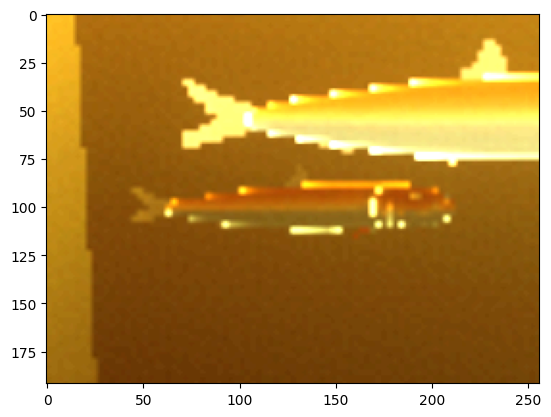

In [39]:
plt.imshow(_img.permute(1, 2, 0).numpy() - _img.view(-1).numpy().min())

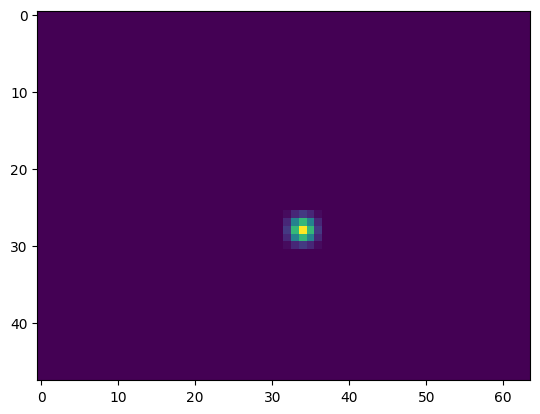

In [40]:
plt.imshow(_labels[4, 3, :, :].numpy() - _labels[0, 0, :, :].numpy().min())

In [41]:
max_iter = len(data_loader)
checkpoint_period = cfg.SOLVER.CHECKPOINT_PERIOD

In [42]:
max_iter, checkpoint_period

(96000, 2400)

In [ ]:
model.train()

In [44]:
_images, _valids, _labels = next(iter(data_loader))
_images, _valids, _labels = _images.to(device), _valids.to(device), _labels.to(device)

In [46]:
_images.shape

torch.Size([32, 3, 192, 256])

In [45]:
loss_dict = model(_images, _valids, _labels)

In [47]:
loss_dict

{'total_loss': tensor(931.0227, device='cuda:0', grad_fn=<AddBackward0>)}

In [48]:
loss_dict['total_loss'].detach()

tensor(931.0227, device='cuda:0')

In [49]:
for iteration, (images, valids, labels) in enumerate(data_loader):
    iteration = iteration + 1
    images = images.to(device)
    valids = valids.to(device)
    labels = labels.to(device)

    scheduler.step()
    loss_dict = model(images, valids, labels)
    losses = sum(loss for loss in loss_dict.values())

    optimizer.zero_grad()
    losses.backward()
    optimizer.step()

    if cfg.RUN_EFFICIENT:
        del images, valids, labels, losses

    # if engine.local_rank == 0:
    #     if iteration % 20 == 0 or iteration == max_iter:
    #         log_str = 'Iter:%d, LR:%.1e, ' % (
    #             iteration, optimizer.param_groups[0]["lr"] / num_gpu)
    #         for key in loss_dict:
    #             tb_writer.add_scalar(
    #                 key,  loss_dict[key].mean(), global_step=iteration)
    #             log_str += key + ': %.3f, ' % float(loss_dict[key])

    #         time2 = time.time()
    #         elapsed_time = time2 - time1
    #         time1 = time2
    #         required_time = elapsed_time / 20 * (max_iter - iteration)
    #         hours = required_time // 3600
    #         mins = required_time % 3600 // 60
    #         log_str += 'To Finish: %dh%dmin,' % (hours, mins)

    #         logger.info(log_str)
    if iteration % 20 == 0 or iteration == max_iter:
        log_str = 'Iter:%d, LR:%.1e, ' % (
            iteration, optimizer.param_groups[0]["lr"] / num_gpu)
        for key in loss_dict:
            log_str += key + ': %.3f, ' % float(loss_dict[key])
        print(log_str)

    if iteration % checkpoint_period == 0 or iteration == max_iter:
        # engine.update_iteration(iteration)
        # if engine.distributed and (engine.local_rank == 0):
        #     engine.save_and_link_checkpoint(cfg.OUTPUT_DIR)
        # elif not engine.distributed:
        #     engine.save_and_link_checkpoint(cfg.OUTPUT_DIR)
        pass

    if iteration >= max_iter:
        print('Finish training process!')
        break

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Iter:20, LR:5.4e-05, total_loss: 957.374, 
Iter:40, LR:5.8e-05, total_loss: 887.346, 
Iter:60, LR:6.1e-05, total_loss: 848.007, 
Iter:80, LR:6.5e-05, total_loss: 977.656, 
Iter:100, LR:6.9e-05, total_loss: 1036.389, 
Iter:120, LR:7.3e-05, total_loss: 867.083, 
Iter:140, LR:7.6e-05, total_loss: 900.750, 
Iter:160, LR:8.0e-05, total_loss: 812.435, 
Iter:180, LR:8.4e-05, total_loss: 969.425, 
Iter:200, LR:8.7e-05, total_loss: 953.979, 
Iter:220, LR:9.1e-05, total_loss: 965.849, 
Iter:240, LR:9.5e-05, total_loss: 932.542, 
Iter:260, LR:9.9e-05, total_loss: 874.132, 
Iter:280, LR:1.0e-04, total_loss: 847.119, 
Iter:300, LR:1.1e-04, total_loss: 873.827, 
Iter:320, LR:1.1e-04, total_loss: 920.521, 
Iter:340, LR:1.1e-04, total_loss: 956.442, 
Iter:360, LR:1.2e-04, total_loss: 871.776, 
Iter:380, LR:1.2e-04, total_loss: 873.766, 
Iter:400, LR:1.3e-04, total_loss: 839.909, 
Iter:420, LR:1.3e-04, total_loss: 912.102, 
Iter:440, LR:1.3e-04, total_loss: 837.608, 
Iter:460, LR:1.4e-04, total_loss: 8

KeyboardInterrupt: ignored

In [50]:
torch.save(model.state_dict(), 'rsn_15120itr.pth')

In [51]:
torch.save(model.state_dict(), '/content/drive/MyDrive/rsn_15120itr.pth')

## evaluate

In [26]:
config = Config()
cfg = config

In [27]:
model = RSN(cfg, run_efficient=cfg.RUN_EFFICIENT)

In [28]:
model.load_state_dict(torch.load('/content/drive/MyDrive/rsn_15120itr.pth'))

<All keys matched successfully>

In [29]:
device = torch.device(cfg.MODEL.DEVICE)

In [30]:
device

device(type='cuda')

In [ ]:
model.to(device)

In [32]:
import os
import argparse
from tqdm import tqdm
import numpy as np
import cv2
import json

import torch
import torch.distributed as dist


def get_results(outputs, centers, scales, kernel=11, shifts=[0.25]):
    scales *= 200
    nr_img = outputs.shape[0]
    preds = np.zeros((nr_img, cfg.DATASET.KEYPOINT.NUM, 2))
    maxvals = np.zeros((nr_img, cfg.DATASET.KEYPOINT.NUM, 1))
    for i in range(nr_img):
        score_map = outputs[i].copy()
        score_map = score_map / 255 + 0.5
        kps = np.zeros((cfg.DATASET.KEYPOINT.NUM, 2))
        scores = np.zeros((cfg.DATASET.KEYPOINT.NUM, 1))
        border = 10
        dr = np.zeros((cfg.DATASET.KEYPOINT.NUM,
            cfg.OUTPUT_SHAPE[0] + 2 * border, cfg.OUTPUT_SHAPE[1] + 2 * border))
        dr[:, border: -border, border: -border] = outputs[i].copy()
        for w in range(cfg.DATASET.KEYPOINT.NUM):
            dr[w] = cv2.GaussianBlur(dr[w], (kernel, kernel), 0)
        for w in range(cfg.DATASET.KEYPOINT.NUM):
            for j in range(len(shifts)):
                if j == 0:
                    lb = dr[w].argmax()
                    y, x = np.unravel_index(lb, dr[w].shape)
                    dr[w, y, x] = 0
                    x -= border
                    y -= border
                lb = dr[w].argmax()
                py, px = np.unravel_index(lb, dr[w].shape)
                dr[w, py, px] = 0
                px -= border + x
                py -= border + y
                ln = (px ** 2 + py ** 2) ** 0.5
                if ln > 1e-3:
                    x += shifts[j] * px / ln
                    y += shifts[j] * py / ln
            x = max(0, min(x, cfg.OUTPUT_SHAPE[1] - 1))
            y = max(0, min(y, cfg.OUTPUT_SHAPE[0] - 1))
            kps[w] = np.array([x * 4 + 2, y * 4 + 2])
            scores[w, 0] = score_map[w, int(round(y) + 1e-9), \
                    int(round(x) + 1e-9)]
        # aligned or not ...
        kps[:, 0] = kps[:, 0] / cfg.INPUT_SHAPE[1] * scales[i][0] + \
                centers[i][0] - scales[i][0] * 0.5
        kps[:, 1] = kps[:, 1] / cfg.INPUT_SHAPE[0] * scales[i][1] + \
                centers[i][1] - scales[i][1] * 0.5
        preds[i] = kps
        maxvals[i] = scores

    return preds, maxvals


def compute_on_dataset(model, data_loader, device):
    model.eval()
    results = list()
    cpu_device = torch.device("cpu")

    # data = tqdm(data_loader) if is_main_process() else data_loader
    data = tqdm(data_loader)
    for _, batch in enumerate(data):
        imgs, scores, centers, scales, img_ids = batch

        imgs = imgs.to(device)
        with torch.no_grad():
            outputs = model(imgs)
            outputs = outputs.to(cpu_device).numpy()

            if cfg.TEST.FLIP:
                imgs_flipped = np.flip(imgs.to(cpu_device).numpy(), 3).copy()
                imgs_flipped = torch.from_numpy(imgs_flipped).to(device)
                outputs_flipped = model(imgs_flipped)
                outputs_flipped = outputs_flipped.to(cpu_device).numpy()
                outputs_flipped = flip_back(
                        outputs_flipped, cfg.DATASET.KEYPOINT.FLIP_PAIRS)

                outputs = (outputs + outputs_flipped) * 0.5

        centers = np.array(centers)
        scales = np.array(scales)
        preds, maxvals = get_results(outputs, centers, scales,
                cfg.TEST.GAUSSIAN_KERNEL, cfg.TEST.SHIFT_RATIOS)

        kp_scores = maxvals.squeeze().mean(axis=1)
        preds = np.concatenate((preds, maxvals), axis=2)

        for i in range(preds.shape[0]):
            keypoints = preds[i].reshape(-1).tolist()
            score = scores[i] * kp_scores[i]
            image_id = img_ids[i]

            results.append(dict(image_id=image_id,
                                category_id=1,
                                keypoints=keypoints,
                                score=score))

    return results

In [35]:
num_gpus = 1
local_rank = 0

In [36]:
data_loader = get_test_loader(cfg, num_gpus, local_rank, 'val',
        is_dist=False)

loading annotations into memory...
Done (t=0.97s)
creating index...
index created!


In [37]:
results = compute_on_dataset(model, data_loader, device)

100%|██████████| 669/669 [03:34<00:00,  3.11it/s]


In [38]:
len(results)

21398

In [39]:
results[0]

{'image_id': 0,
 'category_id': 1,
 'keypoints': [349.69781282544136,
  304.47687502702075,
  0.5906500816345215,
  311.0709372460842,
  305.4306250810623,
  0.5770241618156433,
  332.5303125679493,
  300.6618748108546,
  0.7051355838775635,
  332.291875064373,
  306.62281264861423,
  0.6550030708312988],
 'score': 0.6319532245397568}

In [40]:
import pandas as pd

In [41]:
pd.Series([r['image_id'] for r in results]).value_counts()

78     49
76     49
43     49
42     49
41     49
       ..
409     5
415     3
412     2
413     2
414     2
Length: 595, dtype: int64

In [42]:
results[362]

{'image_id': 11,
 'category_id': 1,
 'keypoints': [446.15026038885117,
  193.81471385558447,
  0.9787803888320923,
  441.9235678613186,
  237.05703103542328,
  0.6389840841293335,
  443.5492188334465,
  212.0220052997271,
  0.7460921406745911,
  443.8743490278721,
  214.94817713896433,
  0.6731526851654053],
 'score': 0.7592523247003555}

In [46]:
image_id2image(results[362]['image_id'], fish_gt)

{'id': 11, 'width': 640.0, 'height': 360.0, 'file_name': 'camera_11.png'}

In [47]:
_img = Image.open(os.path.join('/content/solo_coco/coco/images', image_id2image(results[362]['image_id'], fish_gt)['file_name'])).convert('RGB')

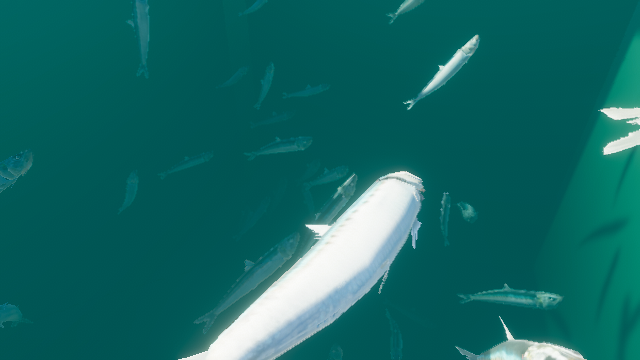

In [48]:
_img

In [49]:
_img_np = np.asarray(_img).astype(np.uint8)

In [51]:

for kp in np.array(results[362]['keypoints']).reshape(-1, 3):
    # pt = (kp[1], kp[0])
    # print(kp)
    pt = (int(kp[0]), int(kp[1]))
    # visible = kp[2]
    # if visible == 0:  # kp => (0, 0, 0), 0 means the joint either does not exist or is outside of the image's bounds
    #     color = (255, 0, 0)  # red
    # elif visible == 1:  # 1 denotes a joint that is inside of the image but cannot be seen because the part of the object it belongs to is not visible in the image
    #     color = (0, 255, 0)  # green
    # elif visible == 2:  # 2 means the joint was present and visible
    #     color = (0, 0, 255)  # blue
    color = (255, 0, 0)
    _img_np = cv2.circle(_img_np, pt, 3, color=color, thickness=-1)

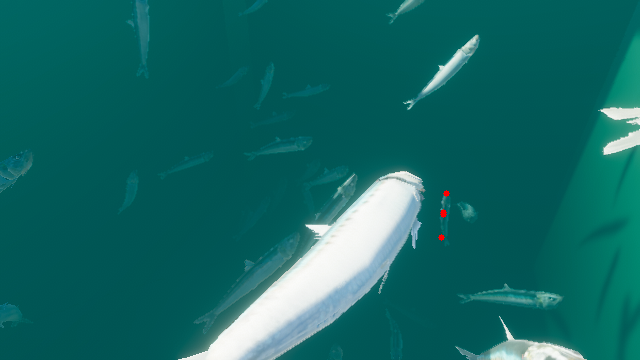

In [52]:
Image.fromarray(_img_np)

In [58]:
_img_np = np.asarray(_img).astype(np.uint8)

In [59]:
for res in results:
    if res['image_id'] != 11:
        continue
    for kp in np.array(res['keypoints']).reshape(-1, 3):
        # pt = (kp[1], kp[0])
        # print(kp)
        pt = (int(kp[0]), int(kp[1]))
        # visible = kp[2]
        # if visible == 0:  # kp => (0, 0, 0), 0 means the joint either does not exist or is outside of the image's bounds
        #     color = (255, 0, 0)  # red
        # elif visible == 1:  # 1 denotes a joint that is inside of the image but cannot be seen because the part of the object it belongs to is not visible in the image
        #     color = (0, 255, 0)  # green
        # elif visible == 2:  # 2 means the joint was present and visible
        #     color = (0, 0, 255)  # blue
        color = (255, 0, 0)
        _img_np = cv2.circle(_img_np, pt, 3, color=color, thickness=-1)

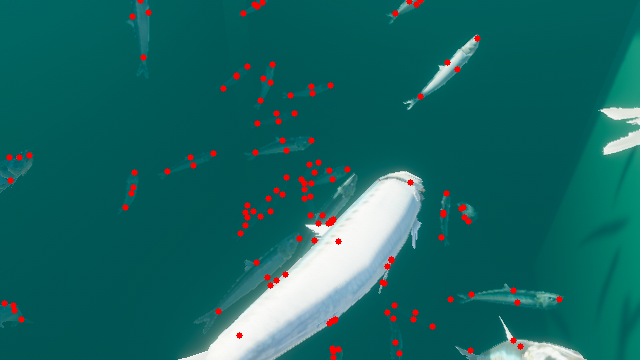

In [60]:
Image.fromarray(_img_np)

In [75]:
_img_np = np.asarray(_img).astype(np.uint8)

In [76]:
# 正解
for anno in fish_gt['annotations']:
    if anno['image_id'] != 11:
        continue
    for kp in np.array(anno['keypoints']).reshape(-1, 3):
        # pt = (kp[1], kp[0])
        # print(kp)
        pt = (kp[0], kp[1])
        visible = kp[2]
        if visible == 0:  # kp => (0, 0, 0), 0 means the joint either does not exist or is outside of the image's bounds
            color = (0, 0, 0)  # black
        elif visible == 1:  # 1 denotes a joint that is inside of the image but cannot be seen because the part of the object it belongs to is not visible in the image
            color = (0, 255, 0)  # green
        elif visible == 2:  # 2 means the joint was present and visible
            color = (0, 0, 255)  # blue
        _img_np = cv2.circle(_img_np, pt, 4, color=color, thickness=-1)

# 予測
for res in results:
    if res['image_id'] != 11:
        continue
    for kp in np.array(res['keypoints']).reshape(-1, 3):
        pt = (int(kp[0]), int(kp[1]))
        color = (255, 0, 0)  # red
        _img_np = cv2.circle(_img_np, pt, 2, color=color, thickness=-1)

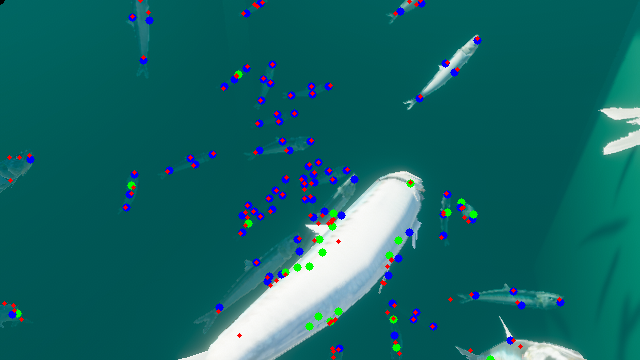

In [77]:
Image.fromarray(_img_np)

In [83]:
def visualize_gt_and_pred_kp(image_id, anno_gt, preds, score_thresh = None):
    _img = Image.open(os.path.join('/content/solo_coco/coco/images', image_id2image(image_id, anno_gt)['file_name'])).convert('RGB')
    _img_np = np.asarray(_img).astype(np.uint8)
    # 正解
    for anno in anno_gt['annotations']:
        if anno['image_id'] != image_id:
            continue
        for kp in np.array(anno['keypoints']).reshape(-1, 3):
            # pt = (kp[1], kp[0])
            # print(kp)
            pt = (kp[0], kp[1])
            visible = kp[2]
            if visible == 0:  # kp => (0, 0, 0), 0 means the joint either does not exist or is outside of the image's bounds
                color = (0, 0, 0)  # black
            elif visible == 1:  # 1 denotes a joint that is inside of the image but cannot be seen because the part of the object it belongs to is not visible in the image
                color = (0, 255, 0)  # green
            elif visible == 2:  # 2 means the joint was present and visible
                color = (0, 0, 255)  # blue
            _img_np = cv2.circle(_img_np, pt, 4, color=color, thickness=-1)

    # 予測
    for res in preds:
        if res['image_id'] != image_id:
            continue
        for kp in np.array(res['keypoints']).reshape(-1, 3):
            pt = (int(kp[0]), int(kp[1]))
            score = kp[2]
            if score_thresh is not None and score < score_thresh:
                continue
            color = (255, 0, 0)
            _img_np = cv2.circle(_img_np, pt, 2, color=color, thickness=-1)

    return Image.fromarray(_img_np)

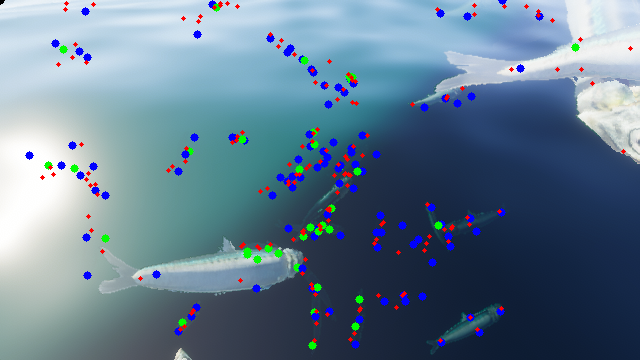

In [82]:
visualize_gt_and_pred_kp(20, fish_gt, results)

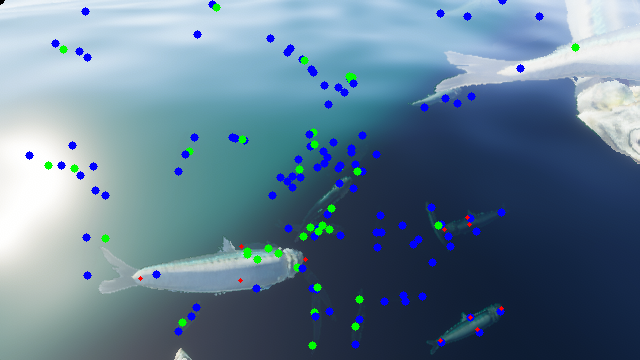

In [86]:
visualize_gt_and_pred_kp(20, fish_gt, results, score_thresh=0.55)

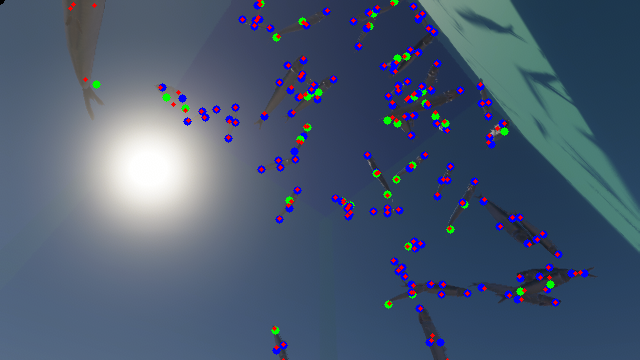

In [87]:
visualize_gt_and_pred_kp(200, fish_gt, results)

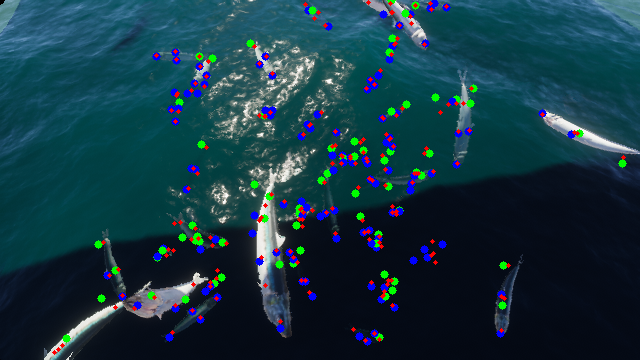

In [90]:
visualize_gt_and_pred_kp(40, fish_gt, results)

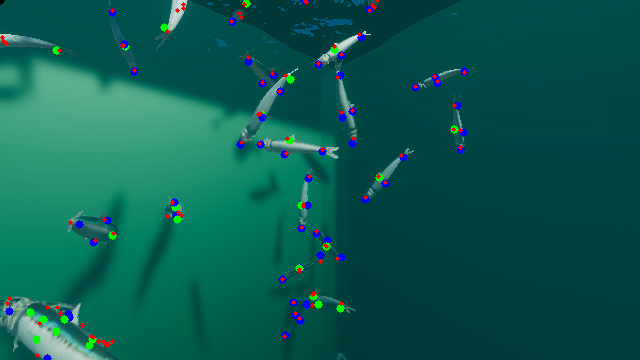

In [92]:
visualize_gt_and_pred_kp(420, fish_gt, results)

In [105]:
def predict(model, image_filepath, bbox):

    model.eval()
    results = list()
    cpu_device = torch.device("cpu")

    x, y, w, h = bbox

    center = np.zeros(2, dtype=np.float32)
    center[0] = x + w / 2.0
    center[1] = y + h / 2.0

    scale = np.array([w * 1.0 / cfg.dataset.PIXEL_STD, h * 1.0 / cfg.dataset.PIXEL_STD],
            dtype=np.float32)

    scale[0] *= (1 + cfg.dataset.TEST.X_EXTENTION)
    scale[1] *= (1 + cfg.dataset.TEST.Y_EXTENTION)
    # fit the ratio
    if scale[0] > cfg.dataset.WIDTH_HEIGHT_RATIO * scale[1]:
        scale[1] = scale[0] * 1.0 / cfg.dataset.WIDTH_HEIGHT_RATIO
    else:
        scale[0] = scale[1] * 1.0 * cfg.dataset.WIDTH_HEIGHT_RATIO

    rotation = 0
    trans = get_affine_transform(center, scale, rotation, cfg.dataset.INPUT_SHAPE)

    img = cv2.imread(image_filepath, cv2.IMREAD_COLOR)

    if img is None:
        raise ValueError('fail to read {}'.format(image_filepath))

    if cfg.dataset.COLOR_RGB:
        data_numpy = cv2.cvtColor(data_numpy, cv2.COLOR_BGR2RGB)
    img = cv2.warpAffine(
        img,
        trans,
        (int(cfg.dataset.INPUT_SHAPE[1]), int(cfg.dataset.INPUT_SHAPE[0])),
        flags=cv2.INTER_LINEAR)

    normalize = transforms.Normalize(mean=cfg.INPUT.MEANS, std=cfg.INPUT.STDS)
    transform = transforms.Compose([transforms.ToTensor(), normalize])
    if transform:
        img = transform(img)

    imgs = img.unsqueeze(0)
    centers = [center]
    scales = [scale]

    imgs = imgs.to(device)
    with torch.no_grad():
        outputs = model(imgs)
        outputs = outputs.to(cpu_device).numpy()

        if cfg.TEST.FLIP:
            imgs_flipped = np.flip(imgs.to(cpu_device).numpy(), 3).copy()
            imgs_flipped = torch.from_numpy(imgs_flipped).to(device)
            outputs_flipped = model(imgs_flipped)
            outputs_flipped = outputs_flipped.to(cpu_device).numpy()
            outputs_flipped = flip_back(
                    outputs_flipped, cfg.DATASET.KEYPOINT.FLIP_PAIRS)

            outputs = (outputs + outputs_flipped) * 0.5

    centers = np.array(centers)
    scales = np.array(scales)
    preds, maxvals = get_results(outputs, centers, scales,
            cfg.TEST.GAUSSIAN_KERNEL, cfg.TEST.SHIFT_RATIOS)

    # kp_scores = maxvals.squeeze().mean(axis=1)
    preds = np.concatenate((preds, maxvals), axis=2)

    for i in range(preds.shape[0]):
        keypoints = preds[i].reshape(-1).tolist()
        score = 1.0#kp_scores[i]

        results.append(dict(category_id=1,
                            keypoints=keypoints,
                            score=score))
    return results, imgs[0].cpu().detach().permute(1, 2, 0).numpy()

In [122]:
sample_id = 376

In [124]:
fish_gt['annotations'][sample_id]

{'segmentation': [],
 'area': 5928,
 'iscrowd': 0,
 'image_id': 11,
 'bbox': [402, 34, 78, 76],
 'keypoints': [477, 40, 2, 419, 98, 2, 445, 63, 2, 454, 72, 2],
 'num_keypoints': 4,
 'category_id': 1,
 'id': 376}

In [125]:
res, img = predict(
    model,
    os.path.join('/content/solo_coco/coco/images', image_id2image(fish_gt['annotations'][sample_id]['image_id'], fish_gt)['file_name']),
    fish_gt['annotations'][sample_id]['bbox']
)

In [126]:
res

[{'category_id': 1,
  'keypoints': [477.8402068018913,
   38.30468964576721,
   1.0510227680206299,
   420.6512249654016,
   96.57830588765646,
   0.7056624293327332,
   447.28979140520096,
   62.56531310081482,
   1.1456607580184937,
   457.6230201423168,
   69.30437517166138,
   0.972091794013977],
  'score': 1.0}]

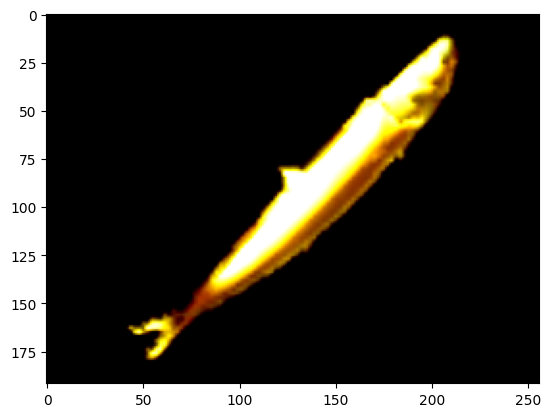

In [127]:
plt.imshow(img)

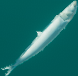

In [123]:
Image.open(
    os.path.join('/content/solo_coco/coco/images', image_id2image(fish_gt['annotations'][sample_id]['image_id'], fish_gt)['file_name'])
).crop(xywh2xyxy(fish_gt['annotations'][sample_id]['bbox']))

In [128]:
!wget https://news.nifty.com/cms_image/news/item/12237-1142812/thumb-12237-1142812-item?_202107081853 -O fish1.jpg

--2023-06-16 10:26:29--  https://news.nifty.com/cms_image/news/item/12237-1142812/thumb-12237-1142812-item?_202107081853
Resolving news.nifty.com (news.nifty.com)... 13.33.90.147
Connecting to news.nifty.com (news.nifty.com)|13.33.90.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43636 (43K) [text/plain]
Saving to: ‘fish1.jpg’

fish1.jpg           100%[===================>]  42.61K  --.-KB/s    in 0.1s    

2023-06-16 10:26:29 (305 KB/s) - ‘fish1.jpg’ saved [43636/43636]



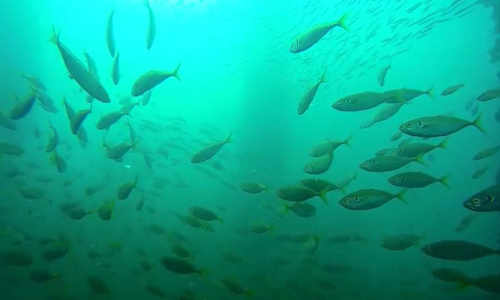

In [144]:
Image.open('/content/fish1.jpg').resize((500, 300))

In [130]:
Image.open('/content/fish1.jpg').size

(952, 531)

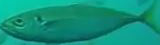

In [155]:
Image.open('/content/fish1.jpg').crop((760, 200, 920, 245))

In [165]:
res, img = predict(
    model,
    '/content/fish1.jpg',
    xyxy2xywh((760, 200, 920, 245))
)

In [166]:
res

[{'category_id': 1,
  'keypoints': [920.3875042200089,
   182.30624906222025,
   0.5172935724258423,
   831.1437495350838,
   251.11250066757202,
   0.5082517862319946,
   837.9562498927116,
   234.7625002861023,
   0.5270247459411621,
   833.1874996423721,
   239.53125039736432,
   0.5415679812431335],
  'score': 1.0}]

In [167]:
def visualize_pred_kp(image_filepath, preds, score_thresh = None, pt_size=2):
    _img = Image.open(image_filepath).convert('RGB')
    _img_np = np.asarray(_img).astype(np.uint8)

    for res in preds:
        for kp in np.array(res['keypoints']).reshape(-1, 3):
            pt = (int(kp[0]), int(kp[1]))
            score = kp[2]
            if score_thresh is not None and score < score_thresh:
                continue
            color = (255, 0, 0)
            _img_np = cv2.circle(_img_np, pt, pt_size, color=color, thickness=-1)

    return Image.fromarray(_img_np)

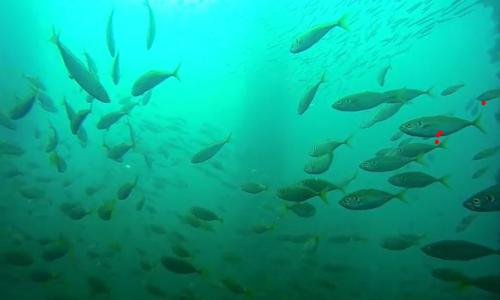

In [168]:
visualize_pred_kp('/content/fish1.jpg', res, pt_size=4).resize((500, 300))